-----
## Проект №2. Исследование объявлений о продаже квартир
### Описание проекта
Имеются данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге за несколько лет. Необходимо научиться определять рыночную стоимость объектов недвижимости, а также установить параметры для построения автоматизированной системы, отслеживающей аномалии и мошеннические действия.
По каждой продаваемой квартире имеется два вида данных. Первые — вносили сами пользователи при публикации объявлений, вторые — получены на основе картографических данных: расстояния до центра, аэропорта, ближайшего парка и водоёма.
### Цели проекта
- подготовить данные к анализу;
- добавить в таблицу данных значения, требуемые в задании 1;
- определить типичные параметры продаваемых квартир;
- найти аномалии в данных;
- определить факторы, которые влияют на продажу квартиры больше всего;
- сравнить цены на квартиры в пригороде и городе;
- выделить сегменты типичных квартри в центре, сравнить корреляции основных факторов с ценой по всем предложениям;
- подобрать наиболее характерные параметры для апартаментов, студий и квартир со свободной планировкой и сравнить с параметрами квартир типовой планировки.
------

## Этап 1. Предобработка данных
### Общая информация о данных

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

Прочитаем файл *real_estate_data.csv*, указав как разделитель знак табуляции: `'\t'` и сохраним его в переменной *data*.

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Выведем на экран первые 10 строк таблицы.

In [4]:
data.head(10)

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,1564812,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,NaN,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,Сталинский,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,NaN,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,NaN,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,NaN,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,NaN,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,NaN,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,NaN,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,NaN,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Общая информация о данных таблицы *data*.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
building_series_id      6517 non-null object
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
area                    23699 non-null float64
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000

В таблице с данными имеется 25 столбцов. Наблюдается большое количество пропусков. Необходимо в последствии будет преобразовать формат значений столбца с датой, изменить тип некоторых значений с *float64* на *int64*. Также можно немного скорректировать названия столбцов: *'cityCenters_nearest', 'parks_around3000', 'ponds_around3000'*. Приведем их к виду: *'city_centers_nearest', 'parks_around_3', 'ponds_around_3'*.

Для переименования столбцов применим метод `rename()`.

In [6]:
data = data.rename(columns={"cityCenters_nearest": "city_centers_nearest", "parks_around3000": "parks_around_3", "ponds_around3000": "ponds_around_3"})

Посмотрим, что получилось.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
building_series_id      6517 non-null object
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
area                    23699 non-null float64
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
city_centers_nearest    18180 non-null float64
parks_around_3  

Теперь названия столбцов устраивают и можно вставить их расшифровку.


Значение | Описание
---------|---------
airports_nearest | расстояние до ближайшего аэропорта в метрах (м)
balcony | число балконов
ceiling_height | высота потолков (м)
city_centers_nearest | расстояние до центра города (м)
days_exposition | сколько дней было размещено объявление (от публикации до снятия)
first_day_exposition | дата публикации
floor | этаж
floors_total | всего этажей в доме
is_apartment | апартаменты (булев тип)
kitchen_area | площадь кухни (м²)
last_price | цена на момент снятия с публикации
living_area | жилая площадь (м²)
locality_name | название населённого пункта
open_plan | свободная планировка (булев тип)
parks_around_3 | число парков в радиусе 3 км
parks_nearest | расстояние до ближайшего парка (м)
ponds_around_3 | число водоёмов в радиусе 3 км
ponds_nearest | расстояние до ближайшего водоёма (м)
rooms | число комнат
studio | квартира-студия (булев тип)
total_area | площадь квартиры в квадратных метрах (м²)
total_images | число фотографий квартиры в объявлении

------

### Работа с пропусками
С помощью методов суммирования пропущенных значений `isnull().sum()` найдем количество пропусков в таблице *data*.

In [11]:
data.isnull().sum()

building_series_id      17182
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
area                        0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3           5518
parks_nearest           15620
ponds_around_3           5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропусков очень много. По моему мнению, одна часть пропусков возникла по причине незаполнения полей параметров квартиры при подаче объявления о продаже. Например, пропуски в столбцах *'ceiling_height'*, *'living_area'*, *'kitchen_area'*, *'is_apartment'*, *'balcony'*, *'floors_total'*, *'locality_name'*. Другая часть пропусков возникла скорее всего в результате ошибок при сборе картографических данных. 

Также, любой из данных пропусков мог возникнуть в результате ошибок при выгрузке данных. К такому случаю я могу отнести столбец 'building_series_id', в котором 72% пропусков. А будь этот столбец полностью заполненным, можно было бы проще заполнить пропуски в других столбцах. В данном случае, следует направить запрос специалистам, которые предоставили данные, чтобы проверить не было ли ошибок при выгрузке данных.

Некоторые пропущенные значения можно будет заменить средним значением или медианой. Для этого выведем на экран основные статистические характеристики таблицы *data* с помощью метода `describe()`.

In [12]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,area,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3,parks_nearest,ponds_around_3,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,60.348651,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,35.654083,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,12.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,40.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,52.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,69.900000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,900.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Проанализировав данную таблицу, можно сказать что значения столбца *'area'* дублируют значения столбца *'total_area'*. В исследовании я буду использовать столбец *'total_area'*. Также присутствуют аномальные значения цены, высоты потолков, значений площадей. Данный момент нужно будет учесть при анализе данных.

Очевидно, что нельзя просто взять и заменить все пропущенные значения средним или медианой. Это внесет искажения в распределение характеристик. Попробуем разбить данные по категориям и заполнить пропуски медианами значений в этих категориях.  

Для начала построим матрицу корреляции для значений столбцов *'rooms', 'total_area', 'living_area', 'kitchen_area', 'ceiling_height', 'floors_total', 'floor', 'balcony'*, чтобы посмотреть на их взаимное влияние.

In [13]:
(data
 .loc[:, ['rooms', 'total_area', 'living_area', 'kitchen_area', 'ceiling_height', 'floors_total', 'floor', 'balcony']]
 .corr()
 .style.format("{:.2f}")
)

,rooms,total_area,living_area,kitchen_area,ceiling_height,floors_total,floor,balcony
rooms,1.00,0.76,0.85,0.27,0.05,-0.23,-0.15,0.02
total_area,0.76,1.00,0.94,0.61,0.10,-0.08,-0.02,0.05
living_area,0.85,0.94,1.00,0.43,0.09,-0.17,-0.10,0.02
kitchen_area,0.27,0.61,0.43,1.00,0.09,0.16,0.14,0.10
ceiling_height,0.05,0.10,0.09,0.09,1.00,-0.03,-0.01,0.04
floors_total,-0.23,-0.08,-0.17,0.16,-0.03,1.00,0.68,0.19
floor,-0.15,-0.02,-0.10,0.14,-0.01,0.68,1.00,0.17
balcony,0.02,0.05,0.02,0.10,0.04,0.19,0.17,1.00


Займемся пропусками в столбце *'living_area'*. Представляется логичным, что значения жилой площади зависят от значений количества комнат в квартире, также это подтверждается матрицей корреляции (коэффициент Пирсона равен 0.85). Я выбираю значения столбца *'rooms'*, а не *'total_area'*, так как по числу комнат легче сгруппировать данные. 

Построим сводную таблицу `data_rooms`, в качестве столбца для группировки выберем *'rooms'*, в значения таблицы пойдут данные столбца *'living_area'*, а в качестве функции для значений используем `'median'`.

In [14]:
data_rooms = data.pivot_table(index='rooms', values='living_area', aggfunc='median')

Выведем сводную таблицу `data_rooms` на экран.

In [15]:
data_rooms

,living_area
rooms,
0,18.000
1,17.600
2,30.500
3,45.000
4,63.600
5,91.785
6,123.900
7,145.000
8,161.000


Добавим в таблицу *data* столбец *'living_area_nan'*, в котором будет значение `True`, если в строке в столбце *'living_area'* пропущено значение, и `False`, если нет. Применим метод `isnull()`.

In [16]:
data['living_area_nan'] = data['living_area'].isnull() 

Проверим данные столбца *'living_area_nan'* с помощью метода `value_counts()`.

In [17]:
data['living_area_nan'].value_counts()

False    21796
True      1903
Name: living_area_nan, dtype: int64

Количество значений `True` и пропусков в данных совпадает.

Напишем функцию `change_living_area`, которая заполнит пропуски в столбце *'living_area'* медианными значениями из таблицы *'data_rooms'*, в зависимости от значения столбца *'rooms'* таблицы *data*.

In [18]:
def change_living_area(row):                         # принимает в качестве аргумента строку таблицы data
    area = row['living_area_nan']                    # присваиваем переменной area значение столбца 'living_area_nan'
    rooms = row['rooms']                             # присваиваем переменной rooms значение столбца 'rooms'   
    if area == True:                                 # проверяется, если значение area равно True, то функция возвращает
        return data_rooms.loc[rooms, 'living_area']  # значение из таблицы data_rooms, обращаясь к ячейке по индексу, равному
                                                     # переменной rooms
    return row['living_area']                        # если значение area равно False, то функция возвращает значение из столбца
                                                     # 'living_area' таблицы data

Заполним пропуски в столбце *'living_area'*, применив к таблице *data* с помощью метода `apply()` функцию `change_living_area`. Чтобы на вход в функцию отправлялись строки укажем в методе параметр `axis=1`.

In [19]:
data['living_area'] = data.apply(change_living_area, axis=1)

Заполним пропуски в столбце *'floors_total'*. Так как число пропусков весьма мало (0,3 % от общего числа значений), то заполним пропуски медианой значений столбца *'floors_total'*. Возьмем значение медианы из таблицы основных статистических характеристик. Используем метод `fillna()`.

In [20]:
data['floors_total'] = data['floors_total'].fillna(9)

Заменим пропущенные значения в столбце *'building_series_id'* на значения *unknown*. Используем метод `fillna()`.

In [21]:
data['building_series_id'] = data['building_series_id'].fillna('unknown')

Займемся пропусками в значениях столбца *'ceiling_height'*. Так как в значениях высоты потолков есть аномальные значения, то придется убирать данные строки из данных, наложив условия на значения высоты потолков. А для этого нужно заполнить пропуски в значениях, иначе у нас пропадет целый пласт данных. Исходя из матрицы корреляции коэффициенты Пирсона для высоты потолков с другими значениями весьма малы (меньше 0.1). Поэтому заменим пропуски в значениях столбца *'ceiling_height'* значением медианы, взятой из таблицы основных статистических характеристик. 

In [22]:
data['ceiling_height'] = data['ceiling_height'].fillna(2.65)

Также следует иметь в виду, что теперь распределение значений высоты потолков будет иметь искажение, так как добавилось больше 9000 значений высоты потолка 2.65 м.

Теперь займемся пропусками в значениях столбца *'kitchen_area'*. Исходя из матрицы корреляции видно что заметная корреляция у параметра *kitchen_area* с параметром *total_area* (0,61).

Для корректной группировки значений столбца *'total_area'* необходимо их категоризировать. Данные для категоризации возьмем из интернета.

Значение | Категория
---------|----------
меньше 34 | эконом
от 34 до 50 | комфорт
от 50 до 100 | бизнес
больше 100 | премиум

Напишем функцию `total_area_categories`, которая будет выполнять данную категоризацию.

In [23]:
def total_area_categories(row):
    if row < 34:
        return 'эконом'
    if 34 <= row < 50:
        return 'комфорт'
    if 50 <= row < 100:
        return 'бизнес'
    return 'премиум'

Применим функцию `total_area_categories` к столбцу *'total_area'* и создадим новый столбец *'area_categories'* в таблице *data*.

In [24]:
data['area_categories'] = data['total_area'].apply(total_area_categories)

Создадим теперь сводную таблицу `data_kitchen`, в качестве столбца для группировки выберем *'area_categories'*, в значения таблицы пойдут данные столбца 'kitchen_area', а в качестве функции для значений используем `'median'`.

In [25]:
data_kitchen = data.pivot_table(index='area_categories', values='kitchen_area', aggfunc='median')

Выведем таблицу на экран, применив сортировку с помощью метода `sort_values()`.

In [26]:
data_kitchen.sort_values('kitchen_area')

,kitchen_area
area_categories,
эконом,6.4
комфорт,8.7
бизнес,10.0
премиум,17.0


Значения площади кухни получились приемлемые.

Добавим в таблицу *data* столбец 'kitchen_area_nan', в котором будет значение `True`, если в строке в столбце 'kitchen_area' пропущено значение, и `False`, если нет. Применим метод `isnull()`.

In [27]:
data['kitchen_area_nan'] = data['kitchen_area'].isnull()

Проверим данные столбца *'kitchen_area_nan'* с помощью метода `value_counts()`.

In [28]:
data['kitchen_area_nan'].value_counts()

False    21421
True      2278
Name: kitchen_area_nan, dtype: int64

Количество значений True и пропусков в данных совпадает.

Напишем функцию `change_kitchen_area`, которая заполнит пропуски в столбце *'kitchen_area'* медианными значениями из таблицы *'data_kitchen'*, в зависимости от значения столбца *'area_categories'* таблицы *data*.

In [29]:
def change_kitchen_area(row): # функция change_kitchen_area работает также, как функция change_living_area
    area = row['kitchen_area_nan']
    category = row['area_categories']
    if area == True:
        return data_kitchen.loc[category, 'kitchen_area']
    return row['kitchen_area']

Заполним пропуски в столбце *'kitchen_area'*, применив к таблице *data* с помощью метода `apply()` функцию `change_kitchen_area`. Чтобы на вход в функцию отправлялись строки укажем в методе параметр `axis=1`.

In [30]:
data['kitchen_area'] = data.apply(change_kitchen_area, axis=1)

Заменим пропущенные значения в столбце *'locality_name'* на значения *unknown*. Используем метод `fillna()`.

In [31]:
data['locality_name'] = data['locality_name'].fillna('unknown')

Займемся пропусками в значениях столбца *'city_centers_nearest'*. Заменить пропуски в данных значениях как-то нужно, потому что эти данные понадобятся при выполнении **Задания 2** исследовательского проекта.

Для начала построим сводную таблицу `data_loc_nan`, в качестве столбца для группировки выберем *'locality_name'*, в значения таблицы пойдут данные столбца 'city_centers_nearest', а в качестве функции для значений используем 'median'.

In [32]:
data_loc_nan = data.pivot_table(index='locality_name', values='city_centers_nearest', aggfunc='median')

Выведем таблицу `data_loc_nan` на экран.

In [33]:
data_loc_nan

,city_centers_nearest
locality_name,
unknown,8943.0
Зеленогорск,53381.0
Колпино,32018.0
Красное Село,29140.5
Кронштадт,49575.0
Ломоносов,51677.0
Павловск,32683.0
Петергоф,33771.0
Пушкин,27930.5


Получилось не так уж и много населенных пунктов, для которых известна медиана расстояния до центра. Найдем их количество с помощью метода `len()`.

In [34]:
len(data_loc_nan['city_centers_nearest'])

29

Теперь найдем количество уникальных названий населенных пунктов в значениях столбца *'locality_name'*, используем комбинацию методов `len()` и `unique()`.

In [35]:
len(data['locality_name'].unique())

365

Сравнивая 29 и 365 можно сделать вывод, что большее количество квартир продается в Санкт-Петербурге и что для большинства населенных пунктов в таблице *data* нет значения расстояния до центра.

Будем заполнять пропуски в значениях столбца *'city_centers_nearest'* вручную, но только в тех, которые будут имеют большее влияние на результаты анализа. Например, заполним пропуски расстояния до центра в первых 20 населенных пунктах с наибольшим числом объявлений о продаже квартир.

Создадим таблицу `data_locality`, используя срез данных методом `query()` и метод `pivot_table()` для создания сводных таблиц.

In [36]:
data_locality = (data
                 .query('locality_name != "Санкт-Петербург"') # выбираем в столбце 'locality_name' населенные пункты
                 # создаем сводную таблицу, столбец для группировки - название населенного пункта, значения - цена квартиры,
                 # функция - count для подсчета количества объявлений
                 .pivot_table(index='locality_name', values=['last_price'], aggfunc='count') 
                )

Меняем название столбца в таблице `data_locality` на *'count'*.

In [37]:
data_locality.columns = ['count']

Создадим столбец *'nan'* в таблице `data_locality`, в котором будет значение `True`, если название поселка есть в таблице *'data_loc_nan'*, и `False`, если нет. Для проверки наличия значения в столбце воспользуемся методом `isin()`.

In [38]:
data_locality['nan'] = data_locality.index.isin(data_loc_nan.index)

Выведем первые 20 значений отсортированной по убыванию таблицы `data_locality`.

In [39]:
data_locality.sort_values('count', ascending=False).head(20)

,count,nan
locality_name,,
посёлок Мурино,522,False
посёлок Шушары,440,True
Всеволожск,398,False
Пушкин,369,True
Колпино,338,True
посёлок Парголово,327,True
Гатчина,307,False
деревня Кудрово,299,False
Выборг,237,False


Итак, получены важные для анализа населенные пункты. Населенные пункты, у которых в значениях столбца *'nan'* - `False`, имеют пропуски в столбце *'city_centers_nearest'*.

Будем заполнять их вручную, исользуя данные из интернета. Для заполнения пропусков используем метод `loc()` для нахождения нужных нам строк из таблицы *'data'*

In [40]:
data.loc[data['locality_name'] == 'Всеволожск', 'city_centers_nearest'] = 25200.0

In [41]:
data.loc[data['locality_name'] == 'Посёлок Мурино', 'city_centers_nearest'] = 21888.0

Обнаружилось, что *'поселок Мурино'* записан еще и как *'посёлок Мурино'*. Поменяем название поселка на *'поселок Мурино'*. Используем метод `replace()`.

In [42]:
data['locality_name'] = data['locality_name'].replace('посёлок Мурино', 'поселок Мурино')

Продолжим дальше заполнять пропуски.

In [43]:
data.loc[data['locality_name'] == 'Гатчина', 'city_centers_nearest'] = 46100.0

In [44]:
data.loc[data['locality_name'] == 'деревня Кудрово', 'city_centers_nearest'] = 14100.0

In [45]:
data.loc[data['locality_name'] == 'Выборг', 'city_centers_nearest'] = 140100.0

In [46]:
data.loc[data['locality_name'] == 'Кудрово', 'city_centers_nearest'] = 14100.0

Аналогичная ситуация с *'деревня Кудрово'* и *'Кудрово'*. Оставим название *'Кудрово'*.

In [47]:
data['locality_name'] = data['locality_name'].replace('деревня Кудрово', 'Кудрово')

In [48]:
data.loc[data['locality_name'] == 'деревня Новое Девяткино', 'city_centers_nearest'] = 19900.0

In [49]:
data.loc[data['locality_name'] == 'Сертолово', 'city_centers_nearest'] = 35000.0

In [50]:
data.loc[data['locality_name'] == 'Кириши', 'city_centers_nearest'] = 159600.0

In [51]:
data.loc[data['locality_name'] == 'Сланцы', 'city_centers_nearest'] = 185500.0

In [52]:
data.loc[data['locality_name'] == 'Волхов', 'city_centers_nearest'] = 132400.0

In [53]:
data.loc[data['locality_name'] == 'Кингисепп', 'city_centers_nearest'] = 133400.0

Посмотрим, что мы имеем по пропускам на данный момент. Воспользуемся `isnull().sum()`.

In [54]:
data.isnull().sum()

building_series_id          0
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20924
studio                      0
area                        0
open_plan                   0
kitchen_area                0
balcony                 11519
locality_name               0
airports_nearest         5542
city_centers_nearest     3367
parks_around_3           5518
parks_nearest           15620
ponds_around_3           5518
ponds_nearest           14589
days_exposition          3181
living_area_nan             0
area_categories             0
kitchen_area_nan            0
dtype: int64

Количество пропусков заметно убавилось.

Посмотрим на значения столбца *'balcony'*. Применим метод `value_counts()`.

In [55]:
data['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

С большой долей вероятности можно сказать, что пропущенные значения - это значение '0', так как число квартир, у которых нет балкона меньше квартир с одним балконом и примерно равно квартирам с двумя балконами. То есть люди просто не заполняли графу с числом балконов, если его нет. Но гипотеза остается гипотезой, и чтоб не вносить искажения в результаты анализа, оставим пропуски как есть.

Также посмотрим на значения столбцов *'is_apartment', 'studio','open_plan'*.

In [56]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [57]:
data['studio'].value_counts()

False    23550
True       149
Name: studio, dtype: int64

In [58]:
data['open_plan'].value_counts()

False    23632
True        67
Name: open_plan, dtype: int64

Проанализировав вышеизложенную иноформацию, можно сказать, что пропущенные значения в столбце *'is_apartment'* это значения - `False`, но для анализа нам потребуются значения `True`, таким образом пропуски также оставляем, так как доконца неизвестно почему так много пропусков в данных.

Что касается значений столбцов *'airports_nearest'*, *'parks_around_3'*, *'parks_nearest'*, *'ponds_around_3'*, *'ponds_around_3'*, *'ponds_nearest'*, *'ponds_nearest'*, days_exposition, заменить пропуски в них правильно на данный момент не представляется возможным. Вручную это очень долго. Заменить значения средним или медианой внесет большие искажения в распределения. Возможно, помог мы запрос на уточнение данных у специалистов, которые эти данные предоставили. Поэтому будем использовать эти данные, как есть. 

Проверим данные на наличие дубликатов. Ипользуем методы `duplicated()` и `sum()`.

In [59]:
data.duplicated().sum()

0

Дубликатов нет пропуски по возможности заполнены, можно переходить к следующему этапу исследования.

------

### Приведение данных к нужным типам

Большая часть значений таблицы `data` имеет вещественный тип данных. Для того, чтобы перевести значения в целочисленный тип данных используется метод `astype()`.

Поменяем тип данных в столбце *'floors_total'* на целочисленный. Используем метод `astype()`.

In [60]:
data['floors_total'] = data['floors_total'].astype('int')

Поменяем тип данных в столбце *'last_price'* на целочисленный. Используем метод `astype()`.

In [61]:
data['last_price'] = data['last_price'].astype('int')

Выведем информацию от таблице `data`.

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 27 columns):
building_series_id      23699 non-null object
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
area                    23699 non-null float64
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 12180 non-null float64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
city_centers_nearest    20332 non-null float64
parks_around_3     

Поменялся тип данных на целочисленный в столбцах *'floors_total'* и *'last_price'*. В значениях столбцов *'total_area', 'ceiling_height', 'living_area', 'kitchen_area'* оставляем вещественный тип данных, так как там по большей части числа с десятичной дробью. В остальных значениях с вещественным типом данных можно было бы поменять на целочисленный, но в них есть пропуски, поэтому оставим тип данных как есть.

------

### Добавление в таблицу `data` новых столбцов по заданию

Добавим в таблицу `data` столбец *'price_square_metre'*, значения которого равны отношению значений столбцов *'last_price'* и *'total_area'*.

In [63]:
data['price_square_metre'] = data['last_price'] / data['total_area']

Поменяем тип данных в столбце *'price_square_metre'* на целочисленный.

In [64]:
data['price_square_metre'] = data['price_square_metre'].astype('int')

Добавим столбец даты *'date_time'* методом `to_datetime` с аргументом `format='%Y-%m-%dT%H:%M:%S'`.

In [65]:
data['date_time'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Добавим также столбцы *'year'*, *'month'*, *'weekday'*, используя методы `dt.year`, `dt.month`, `dt.weekday` соответственно.

In [66]:
data['year'] = data['date_time'].dt.year

In [67]:
data['month'] = data['date_time'].dt.month

In [68]:
data['weekday'] = data['date_time'].dt.weekday

По заданию нужно добавить столбец со значениями: *'первый'* если значение столбца *'floor'* равно 1, *'последний'*, если равно последнему этажу в здании, и *'другой'* при ином значении.

Для этого используем метод `loc()`.

In [69]:
data.loc[data['floor'] == 1, 'what_floor'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'what_floor'] = 'последний'
data.loc[(data['floor'] != data['floors_total']) & (data['floor'] != 1) , 'what_floor'] = 'другой'

In [70]:
data['what_floor'].value_counts()

другой       17441
последний     3366
первый        2892
Name: what_floor, dtype: int64

Добавим столбец *'ratio_living_total'*, в котором будут значения, равные отношению жилой площади к общей площади квартиры.

In [73]:
data['ratio_living_total'] = data['living_area'] / data['total_area']

Добавим столбец *'ratio_kitchen_total'*, в котором будут значения, равные отношению площади кухни к общей площади квартиры.

In [74]:
data['ratio_kitchen_total'] = data['kitchen_area'] / data['total_area']

Выведем добавленные столбцы на экран, сделав срез таблицы `data` методом `loc()` и применив форматирование вывода для последних столбцов. Покажем первые 10 строк.

In [75]:
(data
 .loc[:, ['price_square_metre', 'date_time', 'year', 'month', 'weekday', 'what_floor', 'ratio_living_total', 'ratio_kitchen_total']]
 .head(10)
 .style.format({'ratio_living_total':'{:.2f}', 'ratio_kitchen_total':'{:.2f}'})
 )

,price_square_metre,date_time,year,month,weekday,what_floor,ratio_living_total,ratio_kitchen_total
0,120370,2019-03-07 00:00:00,2019,3,3,другой,0.47,0.23
1,82920,2018-12-04 00:00:00,2018,12,1,первый,0.46,0.27
2,92785,2015-08-20 00:00:00,2015,8,3,другой,0.61,0.15
3,408176,2015-07-24 00:00:00,2015,7,4,другой,0.28,0.11
4,100000,2018-06-19 00:00:00,2018,6,1,другой,0.32,0.41
5,95065,2018-09-10 00:00:00,2018,9,0,другой,0.47,0.30
6,99195,2017-11-02 00:00:00,2017,11,3,другой,0.28,0.39
7,110544,2019-04-18 00:00:00,2019,4,3,другой,0.43,0.26
8,87454,2018-05-23 00:00:00,2018,5,2,другой,0.47,0.27
9,88524,2017-02-26 00:00:00,2017,2,6,другой,0.71,0.11


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 35 columns):
building_series_id      23699 non-null object
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
area                    23699 non-null float64
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 12180 non-null float64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
city_centers_nearest    20332 non-null float64
parks_around_3     

------

## Этап 2. Исследовательский анализ данных

Приступим к выполнению **задания 2**. Ответим на вопрос что является типичными параметрами продаваемых квартир и сколько обычно длится процесс продажи. Также уберем квартиры с очень высокой ценой и другими необычными параметрами.

Одним из самых главных параметров квартиры является площадь. Построим гистограммы распределения общей площади квартиры, жилой площади и площади кухни. Для выбора нужны столбцов используем метод `loc()`, для построения гистрограмм используем метод `plot()` с параметром `kind='hist'` и другими необходимыми параметрами.

Имя к графикам будем добавлять с помощью метода `plt.title()`, размер для графиков устанавливаем 10 х 10 дюймов, также включаем линии сетки.

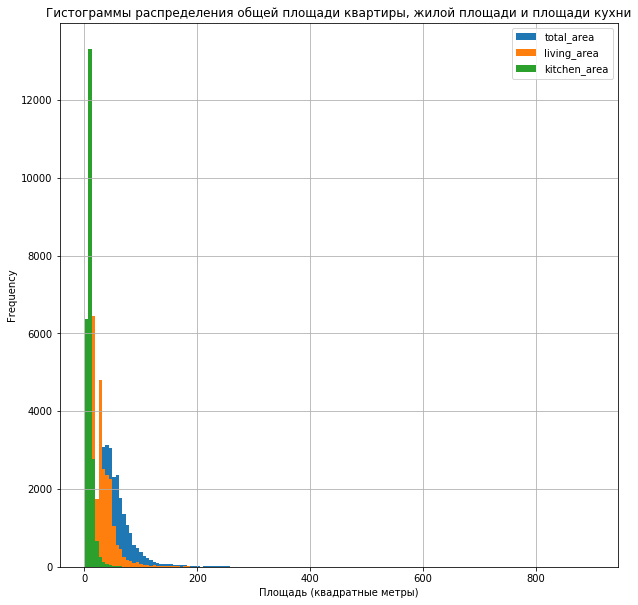

In [404]:
data.loc[:, ['total_area', 'living_area', 'kitchen_area']].plot(kind='hist', bins=150, figsize=(10, 10), grid=True)
plt.title('Гистограммы распределения общей площади квартиры, жилой площади и площади кухни')
plt.xlabel('Площадь (квадратные метры)');

По таким гистограммам можно мало что сказать, построим диаграмму размаха для тех же значений. Используем метод `boxplot()`. Параметру `column` передадим значения общей площади, жилой площади и площади кухни.

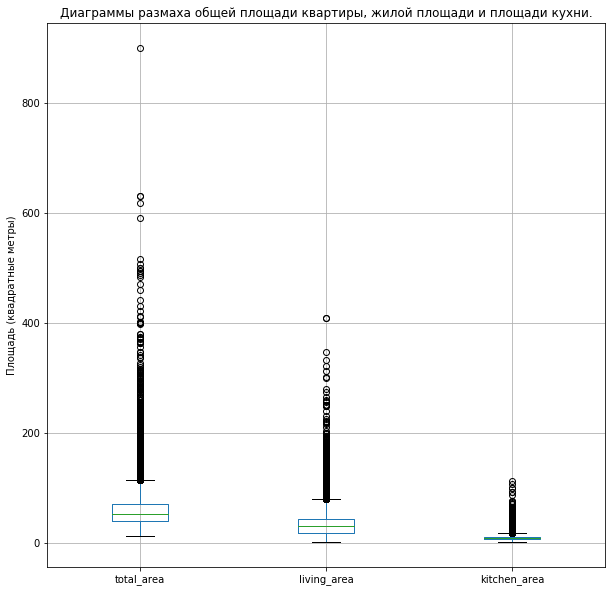

In [405]:
data.boxplot(column=['total_area', 'living_area', 'kitchen_area'], figsize=(10, 10))
plt.title('Диаграммы размаха общей площади квартиры, жилой площади и площади кухни.')
plt.ylabel('Площадь (квадратные метры)');

Для того, чтобы лучше оценить межквартильный размах, введем условие *'total_area < 150'* с помощью метода `query()` к значениями таблицы `data` и построим диаграммы размаха заново. Также с помощью метода `plt.yticks()` добавим необходимые для оценки размаха деления оси OY.

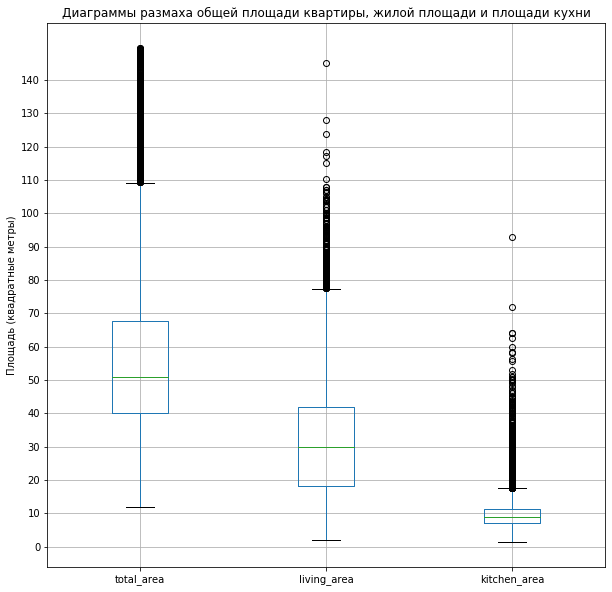

In [406]:
data.query('total_area < 150').boxplot(column=['total_area', 'living_area', 'kitchen_area'], figsize=(10, 10))
plt.yticks(range(0, 150, 10))
plt.title('Диаграммы размаха общей площади квартиры, жилой площади и площади кухни')
plt.ylabel('Площадь (квадратные метры)');

Также с таким условием построим заново гистограммы распределения общей площади квартиры, жилой площади и площади кухни. Условие зададим параметром `range=(0, 150)`, также зададим прозрачность гистограмм параметром `alpha=0.7`.

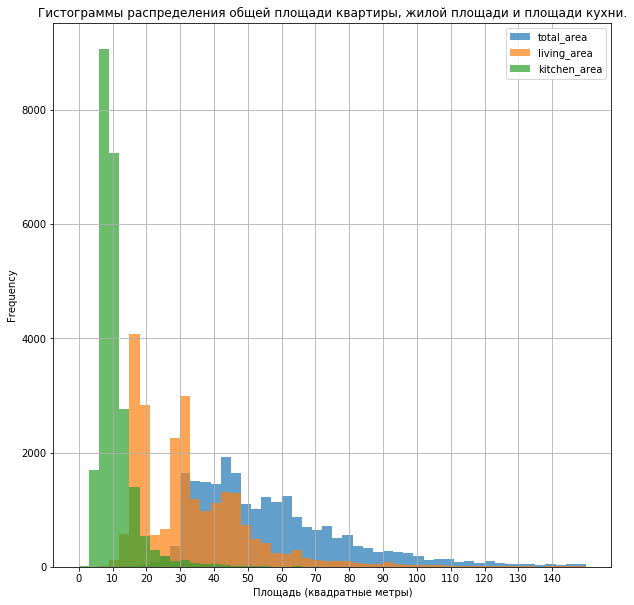

In [407]:
(data
 .loc[:, ['total_area', 'living_area', 'kitchen_area']]
 .plot(kind='hist', bins=50, figsize=(10, 10), grid=True, range=(0, 150), alpha=0.7)
)
plt.title('Гистограммы распределения общей площади квартиры, жилой площади и площади кухни.')
plt.xticks(range(0, 150, 10))
plt.xlabel('Площадь (квадратные метры)');

Теперь графики удобно анализировать.
* Типичное значение общей площади квартиры варьируется от 40 до 65 квадратных метров. Медиана равна 52 квадратным метрам. Судя по гистограмме общей площади, квартиры от 40 до 47 квадратыных метров встречаются чаще, чем остальные значения из межквартильного размаха.
* Типичное значение жилой площади квартиры варьируется от 18 до 42 квадратных метров. Медиана равна 30 квадратным метрам. А вот на гистограмме распределения наблюдается два максимума значений площадей. Первый максимум это от 15 до 18 квадратных метров, второй - от 27 до 34 квадратных метров. Причина таких максимумов будет видна наглядно ниже и заключается в количестве одно- и двухкомнатных квартир. Их подавляющее большинство, следовательно также распределяется зависящие от числа комнат значения жилой площади.
* Типичное значение площади кухни квартиры варьируется от 7 до 11 квадратных метров. Медиана равна 9 квадратным метрам. Такие же данные получаются из анализа гистограммы распределения площади кухни. При таких значениях резкий максимум значений.

Еще одним типичным параметром продаваемых квартир является число комнат.

Построим гистограмму распределения значений *'rooms'* (числа комнат).

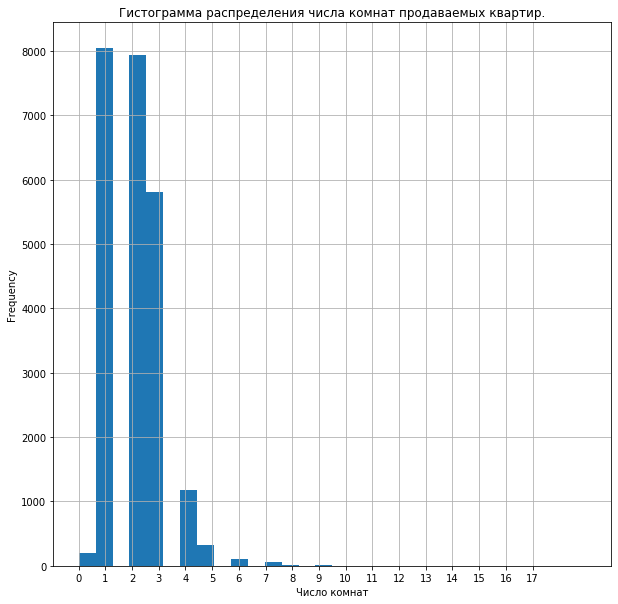

In [408]:
data['rooms'].plot(kind='hist', bins=30, figsize=(10, 10), grid=True)
plt.title('Гистограмма распределения числа комнат продаваемых квартир.')
plt.xticks(range(0, 18, 1))
plt.xlabel('Число комнат');

* Типичные продаваемые квартиры одно-, двух- и трехкомнатные. Причем одно- и двухкомнатных продается примерно одинаково и больше в среднем на 2000 квартир, чем трехкомнатных.

In [409]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Цена продаваемой квартиры является одним из самых главных ее параметров. Построим гистограмму распределения цены продаваемых квартир.

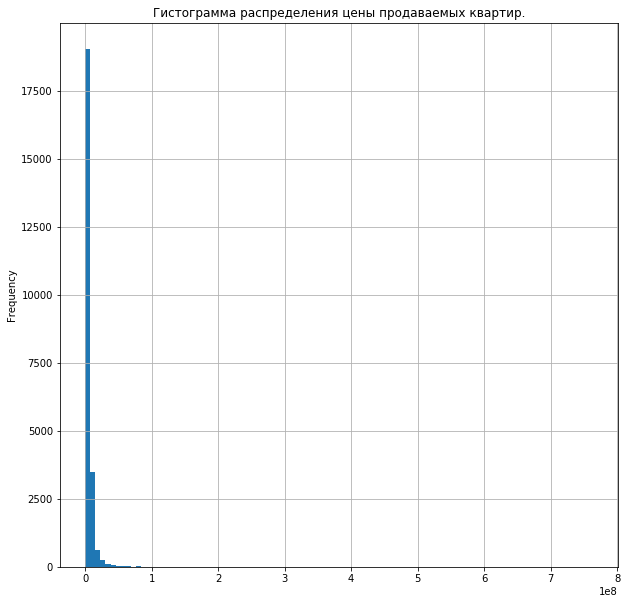

In [410]:
data['last_price'].plot(kind='hist', bins=100, grid=True, figsize=(10, 10))
plt.title('Гистограмма распределения цены продаваемых квартир.');

Данную гистограмму сложно анализировать, построим диаграмму размаха для цены.

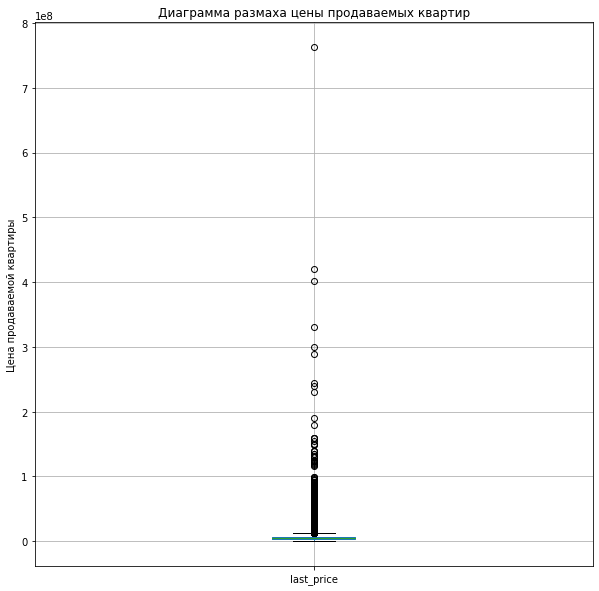

In [411]:
data.boxplot(column=['last_price'], figsize=(10, 10))
plt.title('Диаграмма размаха цены продаваемых квартир')
plt.ylabel('Цена продаваемой квартиры');

В значениях цены есть явные выбросы. Для того чтобы оценить значения мажквартильного интервала введем условие *'last_price < 0.2e8'* для значений цены и построим диаграмму размаха заново. Также с помощью метода `plt.yticks()` добавим необходимые для оценки размаха деления оси OY.

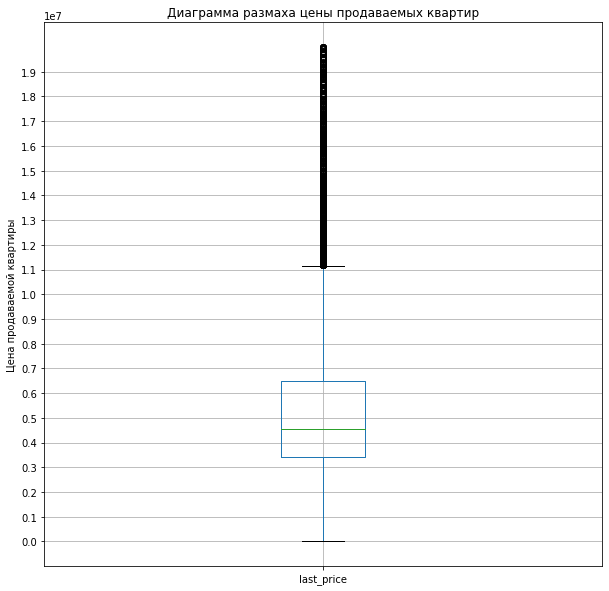

In [412]:
(data
 .query('last_price < 0.2e8')
 .boxplot(column=['last_price'], figsize=(10, 10))
 )
plt.yticks(range(0, 20000000, 1000000))
plt.title('Диаграмма размаха цены продаваемых квартир')
plt.ylabel('Цена продаваемой квартиры');

Также с таким условием построим заново гистограмму распределения цены продаваемой квартиры. Условие зададим параметром `range=(0, 0.2e8)`. Добавим необходимые для оценки значений цены деления на оси OX.

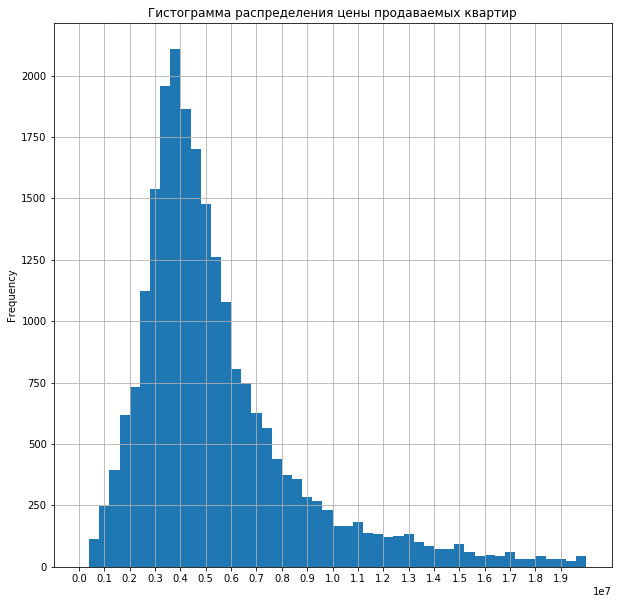

In [413]:
data['last_price'].plot(kind='hist', bins=50, grid=True, figsize=(10, 10), range=(0, 0.2e8))
plt.xticks(range(0, 20000000, 1000000))
plt.title('Гистограмма распределения цены продаваемых квартир');

* Распределение цены продаваемых квартир похоже на нормальное распределение. Типичное значение цены продаваемой квартиры варьируется от 3,5 до 6,5 млн. рублей. Медиана равна 4,5 млн. рублей. А вот на гистограмме распределения цены заметно, что наиболее часто встречается цена от 3,5 до 5 млн. рублей.

Еще одним важным параметром продаваемой квартиры является цена квадратного метра. Построим гистограмму распределения цены квадратного метра.

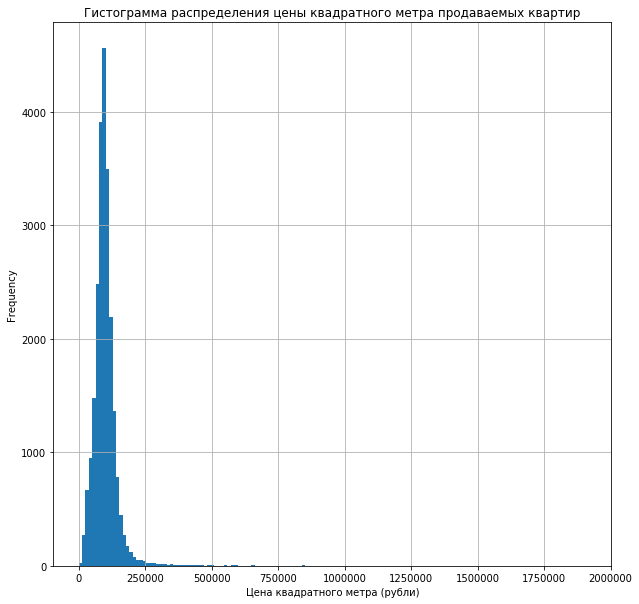

In [414]:
data['price_square_metre'].plot(kind='hist', bins=150, grid=True, figsize=(10, 10))
plt.title('Гистограмма распределения цены квадратного метра продаваемых квартир')
plt.xlabel('Цена квадратного метра (рубли)');

Данную гистограмму сложно анализировать, построим диаграмму размаха для цены квадратного метра.

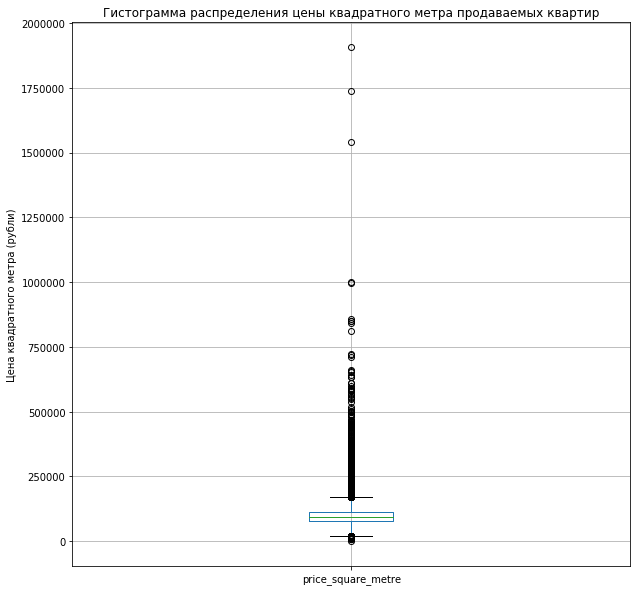

In [415]:
data.boxplot(column=['price_square_metre'], figsize=(10, 10))
plt.title('Гистограмма распределения цены квадратного метра продаваемых квартир')
plt.ylabel('Цена квадратного метра (рубли)');

В значениях цены есть явные выбросы. Для того чтобы оценить значения мажквартильного интервала введем условие *'price_square_metre < 500000'* для значений цены квадратного метра и построим диаграмму размаха заново. Также с помощью метода `plt.yticks()` добавим необходимые для оценки размаха деления оси OY.

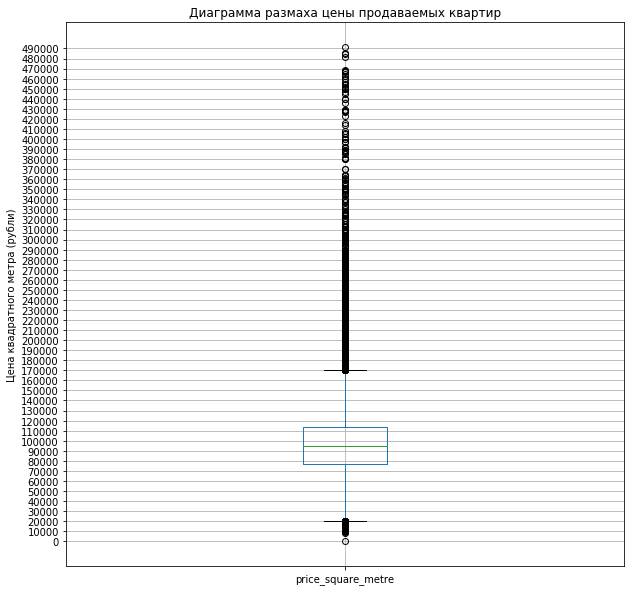

In [416]:
data.query('price_square_metre < 500000').boxplot(column=['price_square_metre'], figsize=(10, 10))
plt.yticks(range(0, 500000, 10000))
plt.title('Диаграмма размаха цены продаваемых квартир')
plt.ylabel('Цена квадратного метра (рубли)');

Также с таким условием построим заново гистограмму распределения цены квадратного метра продаваемой квартиры. Условие зададим параметром `range=(0, 500000)`. Добавим необходимые для оценки значений цены деления на оси OX.

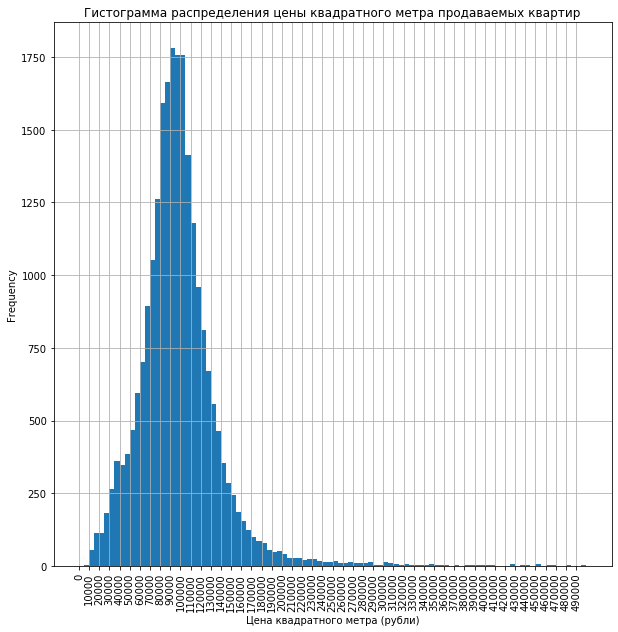

In [417]:
data['price_square_metre'].plot(kind='hist', bins=100, grid=True, figsize=(10, 10), range=(0, 500000))
plt.xticks(range(0, 500000, 10000), rotation='vertical')
plt.title('Гистограмма распределения цены квадратного метра продаваемых квартир')
plt.xlabel('Цена квадратного метра (рубли)');

* Распределение цены квадратного метра продаваемых квартир похоже на нормальное распределение. Типичное значение цены квадратного метра продаваемой квартиры варьируется от 78 до 112 тыс. рублей. Медиана равна 95 тыс. рублей. Значения диаграммы размаха совпадают с гистограммой распределения, примерно на те же значения приходится максимум значений. 

Ответим на вопрос из задания, сколько обычно длится процесс продажи квартиры. Построим гистограмму распределения значений *'days_exposition'* (сколько времения прошло от момента публикации объявления до снятия).

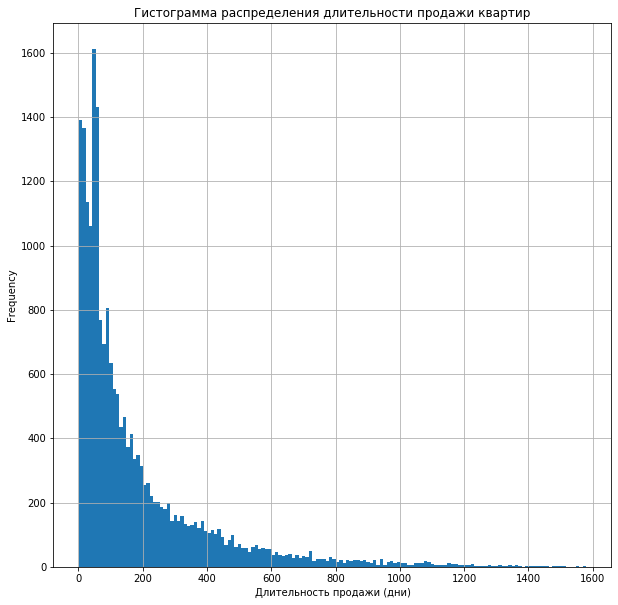

In [418]:
data['days_exposition'].plot(kind='hist', bins=150, grid=True, figsize=(10, 10))
plt.title('Гистограмма распределения длительности продажи квартир')
plt.xlabel('Длительность продажи (дни)');

Построим также диаграмму размаха для длительности продажи квартир.

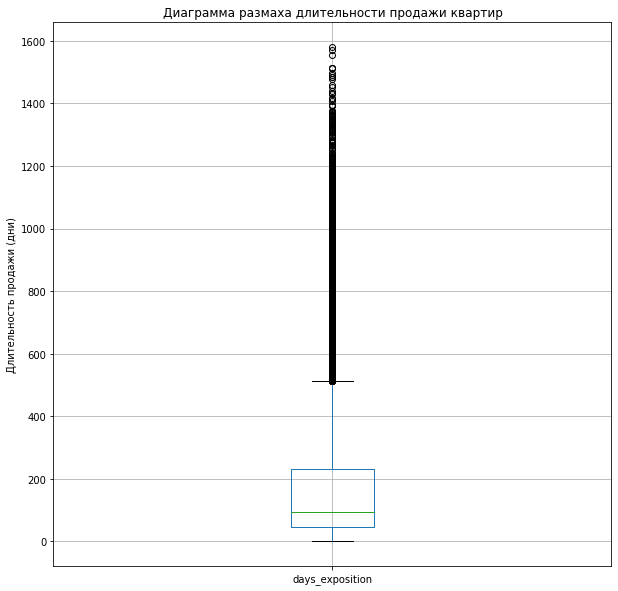

In [419]:
data.boxplot(column=['days_exposition'], figsize=(10, 10))
plt.title('Диаграмма размаха длительности продажи квартир')
plt.ylabel('Длительность продажи (дни)');

Для лучшей оценки межквартильного интервала значений введем условие *'days_exposition < 800'*, то есть длительность продажи квартиры 2 с небольшим года. Заново построим диаграмму размаха для длительности продажи квартир.

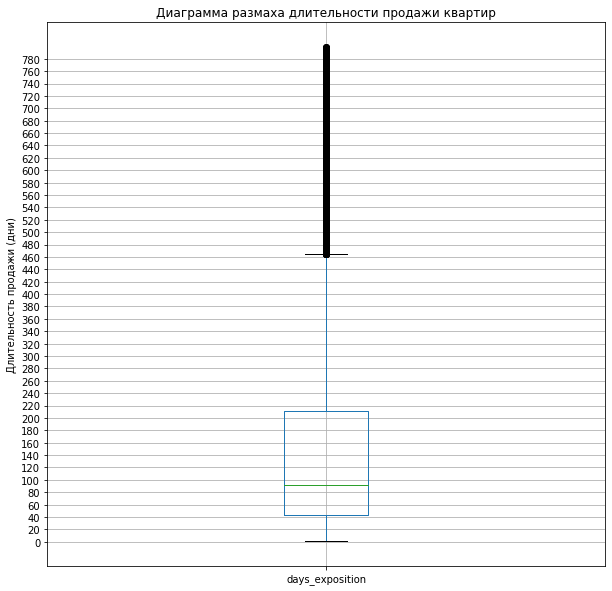

In [420]:
data.query('days_exposition < 800').boxplot(column=['days_exposition'], figsize=(10, 10))
plt.yticks(range(0, 800, 20))
plt.title('Диаграмма размаха длительности продажи квартир')
plt.ylabel('Длительность продажи (дни)');

Также с таким условием построим заново гистограмму распределения цены квадратного метра продаваемой квартиры. Условие зададим параметром `range=(0, 800)`. Добавим необходимые для оценки значений цены деления на оси OX.

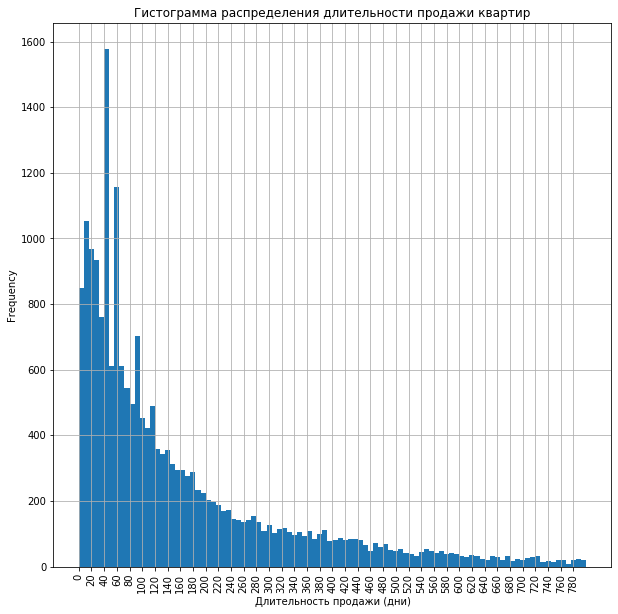

In [421]:
data['days_exposition'].plot(kind='hist', bins=100, grid=True, figsize=(10, 10), range=(0, 800))
plt.xticks(range(0, 800, 20), rotation='vertical')
plt.title('Гистограмма распределения длительности продажи квартир')
plt.xlabel('Длительность продажи (дни)');

* Обычно процесс продажи занимает от 42 до 210 дней. Медиана равна 90 дням. График гистограммы распределения похож на распределение Пуассона, за исключением двух максимумов: первый - 40 дней, второй - 60 дней. Есть еще один максимум поменьше - 90 дней. Чем объясняется всплеск продажи квартир в эти дни пока непонятно, небходимо более глубокое исследование с разбором конкретных квартир и с соспоставлением их продажи с конкретной датой. Может на это время выпадали какие-то акции с огромныеми скидками, или банки снижали процент по ипотеке. А возможно это как раз проявление неких мошеннических операций с недвижимостью, например продажа конфискованных квартир по низкой цене. В любом случае такие моменты нужно исследовать более детально.

Рассмотрим еще один параметр продаваемых квартир - расстояние до центра, в нашем случае Санкт-Петербурга. Построим гистограмму распределения расстояния до центра.

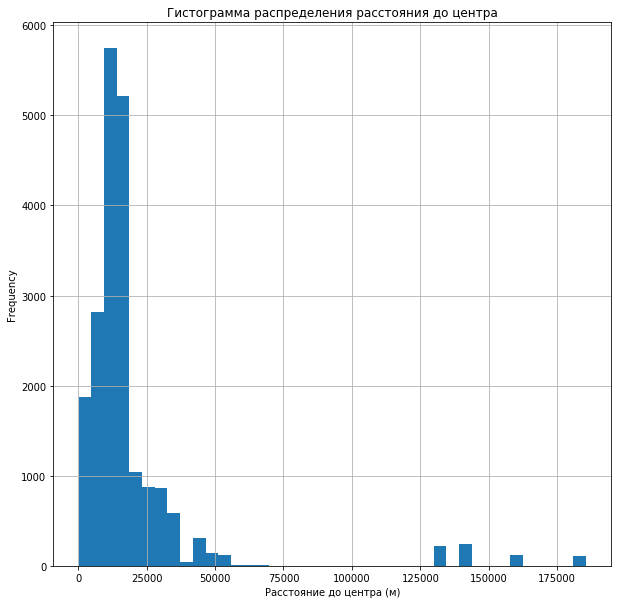

In [422]:
data['city_centers_nearest'].plot(kind='hist', bins=40, grid=True, figsize=(10, 10))
plt.title('Гистограмма распределения расстояния до центра')
plt.xlabel('Расстояние до центра (м)');

Построим диаграмму размаха расстояния до центра.

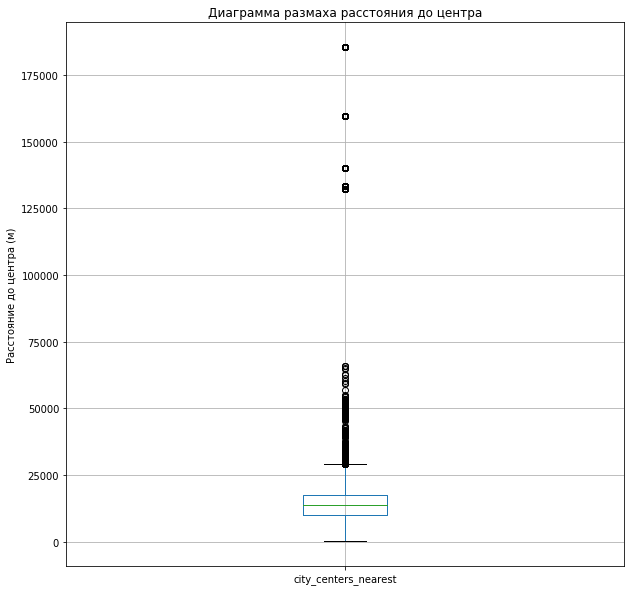

In [423]:
data.boxplot(column=['city_centers_nearest'], figsize=(10, 10))
plt.title('Диаграмма размаха расстояния до центра')
plt.ylabel('Расстояние до центра (м)');

Для лучшей оценки межквартильного интервала значений введем условие *'city_centers_nearest < 75000'*. Заново построим диаграмму размаха расстояния до центра.

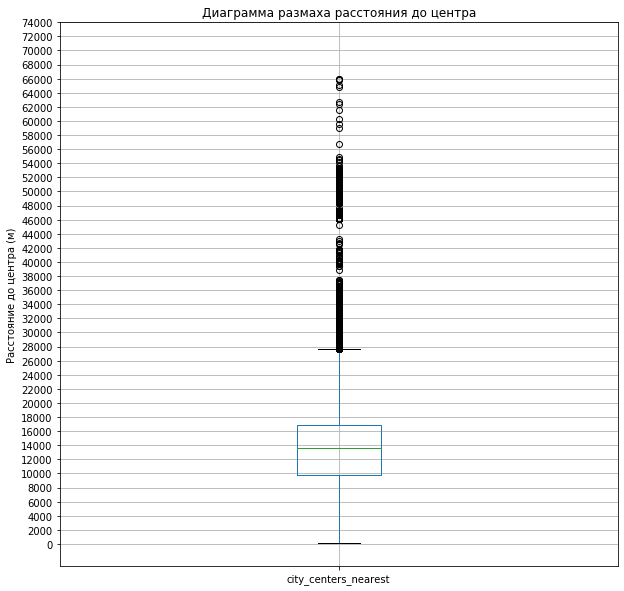

In [424]:
data.query('city_centers_nearest < 75000').boxplot(column=['city_centers_nearest'], figsize=(10, 10))
plt.yticks(range(0, 75000, 2000))
plt.title('Диаграмма размаха расстояния до центра')
plt.ylabel('Расстояние до центра (м)');

Также с таким условием построим заново гистограмму распределения расстояния до центра. Условие зададим параметром `range=(0, 75000)`. Добавим необходимые для оценки значений цены деления на оси OX.

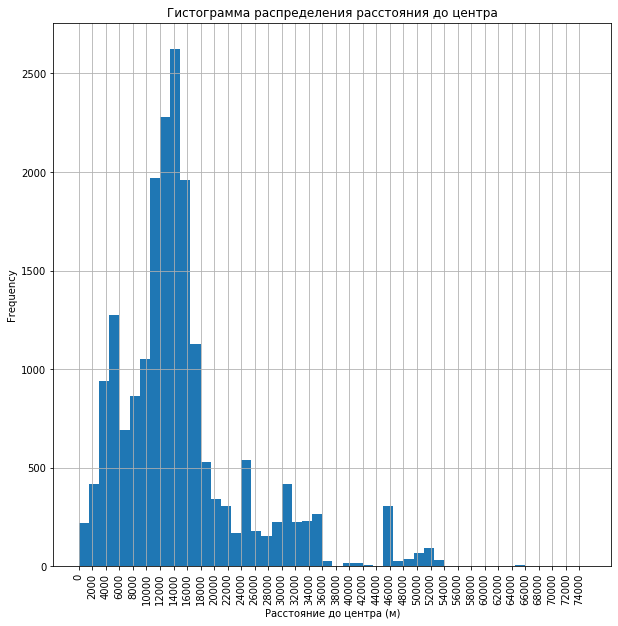

In [425]:
data['city_centers_nearest'].plot(kind='hist', bins=50, grid=True, figsize=(10, 10), range=(0, 75000))
plt.xticks(range(0, 75000, 2000), rotation='vertical')
plt.title('Гистограмма распределения расстояния до центра')
plt.xlabel('Расстояние до центра (м)');

Прежде чем приступить к анализу графиков, необходимо вспомнить что в данных расстояния до центра есть немалое количество пропусков. Но эти пропуски в основном в значениях расстояния до центра квартир, которые находятся в населенных пунктах. А так как подавляющее количество квартир продается в городе, то оценка графиков покажет более менее реальные данные. 

* Итак, типичное значение расстояния до центра продаваемых квартир варьируется в пределах от 10 до 17 км, то есть в пределах города. Медиана составляет где-то 13,8 км. Примерно такие же значения наблюдаются на гистограмме распределения расстояния до центра, они выпадют на максимум значений. Если посмотреть на гистограмму распределения расстояния до центра, то она напоминает нормальное распределение, за исключением одного выделяющегося максимума в пределах от 3 до 6 км. Возможно, это ошибки работы системы, которая собирает картографические данные, либо ошибка выгрузки данных. В любом случае нужно разбираться в этой ситуации более детально.

По заданию 2 предполагается убрать квартиры с очень высокой ценой и другими необычными параметрами. Часть аномальных значений уже обнаружена. Осталось еще посмотреть на распределение значений высоты потолков, этажа и количества этажей продаваемых квартир. Судя по таблице основных статистических характерситик в значениях высоты потолков присутствуют аномально высокие и аномально низкие значения.

Построим гистограмму расределения высоты потолков продаваемых квартир.

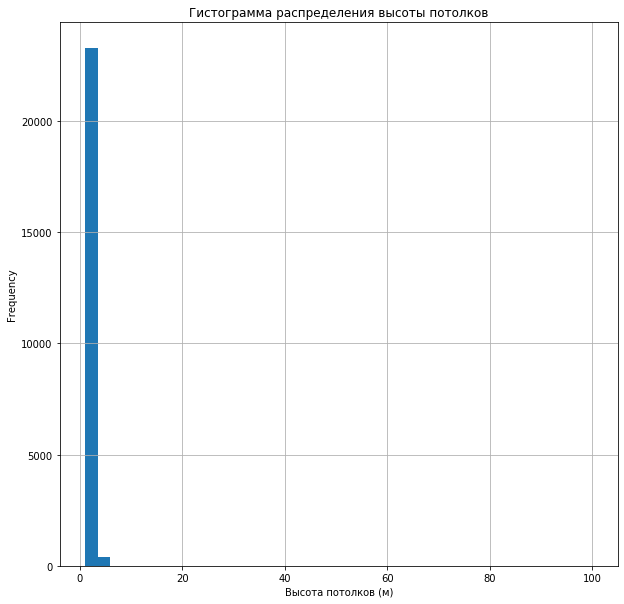

In [426]:
data['ceiling_height'].plot(kind='hist', bins=40, grid=True, figsize=(10, 10))
plt.title('Гистограмма распределения высоты потолков')
plt.xlabel('Высота потолков (м)');

Построим диаграмму размаха высоты потолков.

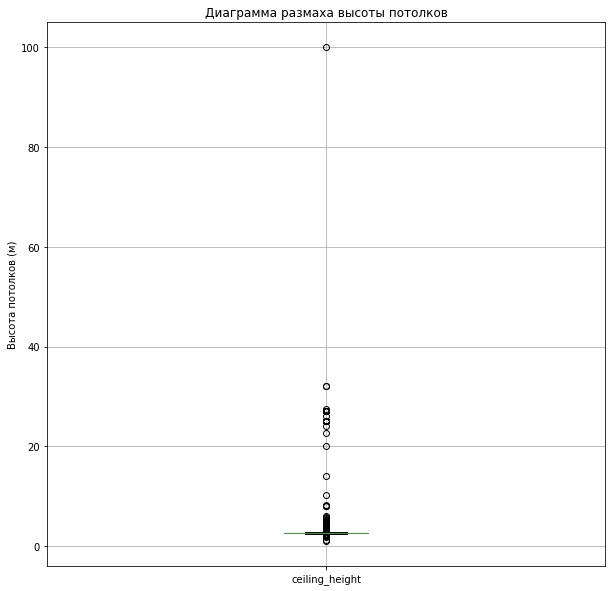

In [427]:
data.boxplot(column=['ceiling_height'], figsize=(10, 10))
plt.title('Диаграмма размаха высоты потолков')
plt.ylabel('Высота потолков (м)');

Распределение имеет явные выбросы данных. Для лучшей оценки межквартильного размаха введем условие *'2 <= ceiling_height < 4'*. Построим заново диаграмму размаха.

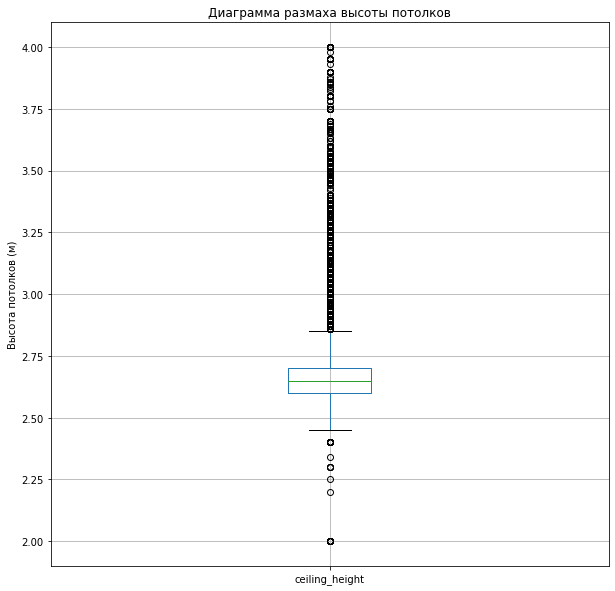

In [428]:
data.query('2 <= ceiling_height <= 4').boxplot(column=['ceiling_height'], figsize=(10, 10))
plt.title('Диаграмма размаха высоты потолков')
plt.ylabel('Высота потолков (м)');

Также с таким условием построим заново гистограмму распределения высоты потолков.

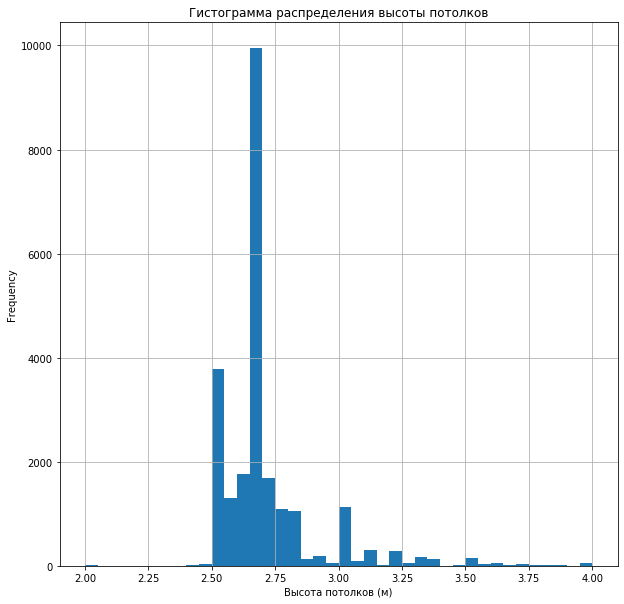

In [429]:
data.query('2 <= ceiling_height <= 4')['ceiling_height'].plot(kind='hist', bins=40, grid=True, figsize=(10, 10))
plt.title('Гистограмма распределения высоты потолков')
plt.xlabel('Высота потолков (м)');

* Типичное значение высоты потолков варьируется в узких пределах: от 2,6 м до 2,7 м. Медиана равна 2,65 м. Такая же картина наблюдается на графике гистограммы распределения. Это объясняется тем, что более 9000 пропусков в значениях высоты потолков были заменены значением 2,65 м. Отсюда и искажения в распределениях.

Построим гистограммы распределения значений этажа и количества этажей продаваемых квартир.

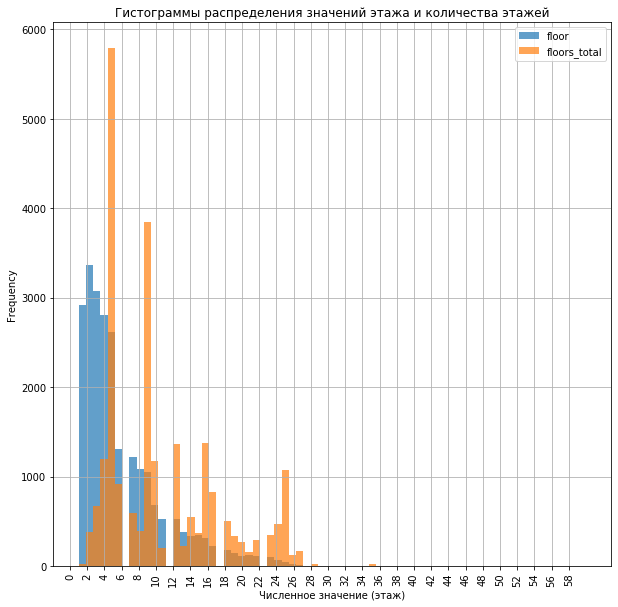

In [430]:
data.loc[:, ['floor', 'floors_total']].plot(kind='hist', bins=70, grid=True, figsize=(10, 10), alpha=0.7)
plt.xticks(range(0, 60, 2), rotation='vertical')
plt.title('Гистограммы распределения значений этажа и количества этажей')
plt.xlabel('Численное значение (этаж)');

Построим диаграммы размаха для значений этажа и количества этажей продаваемых квартир.

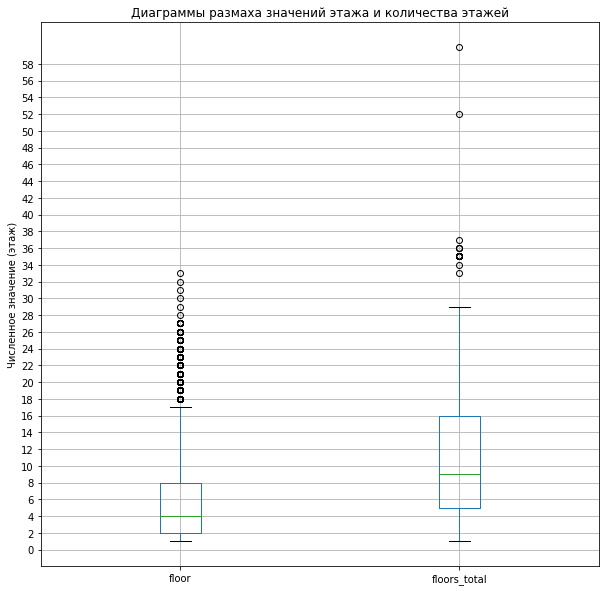

In [431]:
data.boxplot(column=['floor', 'floors_total'], figsize=(10, 10))
plt.yticks(range(0, 60, 2))
plt.title('Диаграммы размаха значений этажа и количества этажей')
plt.ylabel('Численное значение (этаж)');

* Типичное значение этажа продаваемых квартира варьируется от 2 до 8 этажа. Медиана - 4 этаж. Если посмотреть на гистограмму распределения значений этажа, то там максимум значений приходится на интервал от 1 до 5 этажа. Это объясняется большим количеством пятиэтажных зданий в данной выборке.
* Типичное значение количества этажей в зданиях с продаваемыми квартирами варьируется от 5 до 16 этажей. Медиана равна 9 этажам. Если посмотреть на гистограмму распределения то заметны два максимума значений: около 6000 квартир продается в пятиэтажных зданиях и около 4000 квартир - в девятиэтажных. Остальные значения количества этажей распределяется более менее равномерно.

Присвоим переменной `data_mod` срез таблицы `data` со следующими условиями: площадь квартиры от 10 до 550 квадратных метров, цена квартиры меньше 20 млн. рублей, число комнат больше или равно 1, высота потолков от 2 до 4 метров и расстояние до центра меньше 75 км. Такие условия должны убрать аномальные значения из таблицы `data`.

In [432]:
data_mod = data.query('10 < total_area < 550 and last_price < 20000000 and rooms >= 1 and 2 <= ceiling_height <= 4 and city_centers_nearest < 75000')

Исследуем, какие факторы больше всего влияют на стоимость квартиры. Для этого необходимо создать матрицу корреляции между ценой квартиры и факторами, которые могут влиять на цену продаваемой квартиры. Используем методы `loc()` и `corr()` для создания таблицы матрицы корреляции `data_price`.

In [433]:
data_price = (data_mod
                    .loc[:, ['living_area', 'rooms', 'kitchen_area', 'ceiling_height', 'floor', 'balcony', 'days_exposition',
                             'last_price', 'total_images', 'total_area', 'city_centers_nearest', 'floors_total',
                             'airports_nearest', 'parks_around_3', 'parks_nearest', 'ponds_around_3', 'ponds_nearest']]
                    .corr()
             )

Чтобы наглядно увидеть какие факторы влияют на цену квартиры больше всего, выведем на экран столбец *'last_price'* таблицы `data_price`, также применим метод `reset_index()` и форматированный вывод для значений коэффициентов Пирсона.

In [434]:
data_price['last_price'].reset_index().style.format({'last_price':'{:.2f}'})

,index,last_price
0,living_area,0.69
1,rooms,0.56
2,kitchen_area,0.58
3,ceiling_height,0.42
4,floor,0.04
5,balcony,0.14
6,days_exposition,0.14
7,last_price,1.00
8,total_images,0.15
9,total_area,0.81


Как видно из таблицы матрицы корреляции, на цену продаваемой квартиры больше всего влияет жилая площадь, количество комнат, площадь кухни, общая площадь квартиры и в меньшей степени расстояние до центра. Коэффициент Пирсона между высотой потолков и ценой квартиры также имеет заметное значение, но это является скорей всего искажением, так как в значениях высоты потолков было заменено более 9000 пропусков одним значением медианы.

Отобразим графически взаимовлияние величин общей площади, жилой площади, площади кухни, расстояния до центра и цены квартиры. Число комнат использовать не будем, так как жилая площадь находится в прямой зависимости от числа комнат в типичной квартире. Построим диаграммы рассеяния для данных пяти параметров. Используем метод `plotting.scatter_matrix`.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f31749e6710>,
      dtype=object)

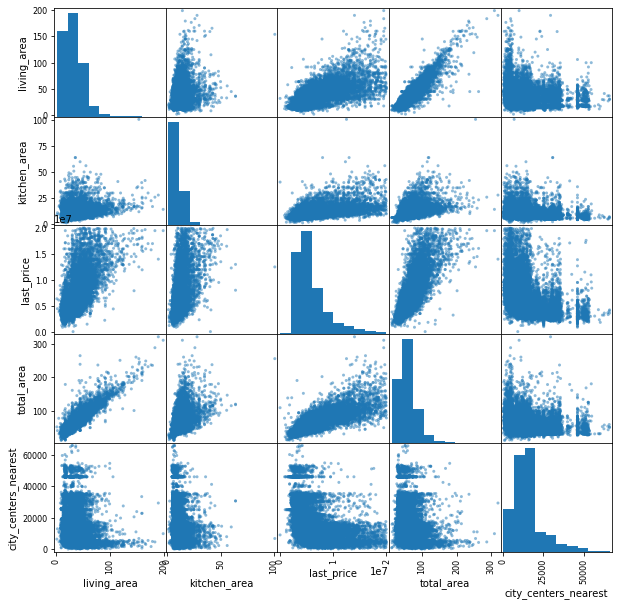

In [435]:
pd.plotting.scatter_matrix(data_mod.loc[:, ['living_area', 'kitchen_area','last_price', 'total_area', 'city_centers_nearest']], figsize=(10, 10))

* Судя по диаграммам рассеивания жилой площади, площади кухни, общей площади и цены квартиры, наблюдается заметное влияние данных факторов на цену продаваемой квартиры. Также анализируя диаграмму рассеивания значений расстояния до центра и цены квартиры, можно сказать что при увеличении расстояния от центра, цена на квартиру до определенного момента снижается весьма заметно, а после этого снижается плавнее.

Исследуем, как влияет на цену квадратного метра число комнат в продаваемой квартире. Для этого построим столбчатый график, значениями которого будут медианы, значений столбца *'rooms'*, сгруппированных по числу комнат. Группировку сделаем методом `groupby()`, медиану посчитаем методом `median()`, график построим методом `plot` с параметром `kind='bar'`. Также запишем необходимые методы и параметры для более наглядного отображения графика.

Text(0, 0.5, 'Цена квадратного метра (рубли)')

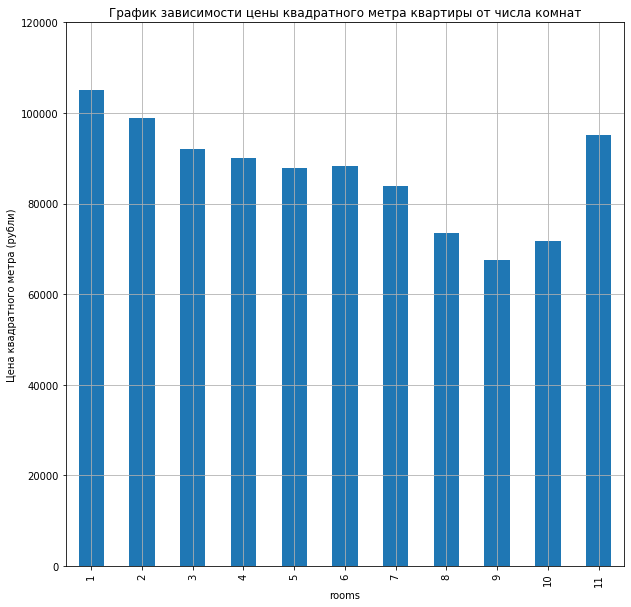

In [436]:
(data_mod
 .groupby('rooms')['price_square_metre'].median()
 .plot(x='rooms', y='price_square_metre', kind='bar', ylim=(0,120000), grid=True, figsize=(10,10))
)
plt.title('График зависимости цены квадратного метра квартиры от числа комнат');
plt.ylabel('Цена квадратного метра (рубли)')

* Наблюдается явное влияние числа комнат на цену квадратного метра продаваемых квартир. Самая высокая цена у однокомнатных квартир, затем она постепенно снижается. Цена квадратного метра квартир начинает увеличиваться при числе комнат больше 9. Но количество таких квартир в нашей выборке весьма мало. Поэтому можно сказать, что при увеличении числа комнат в продаваемых квартирах, стоимость квадратного метра квартир уменьшается.

Исследуем, как влияет на цену квадратного метра квартиры этаж, на котором расположена квартира - первый или последний. Для этого выберем из таблицы `data` этажи со значениями первый и последний, сгруппируем по этим двум признакам и найдем значения медианы цены квадратного метра. Построим столбчатый график.

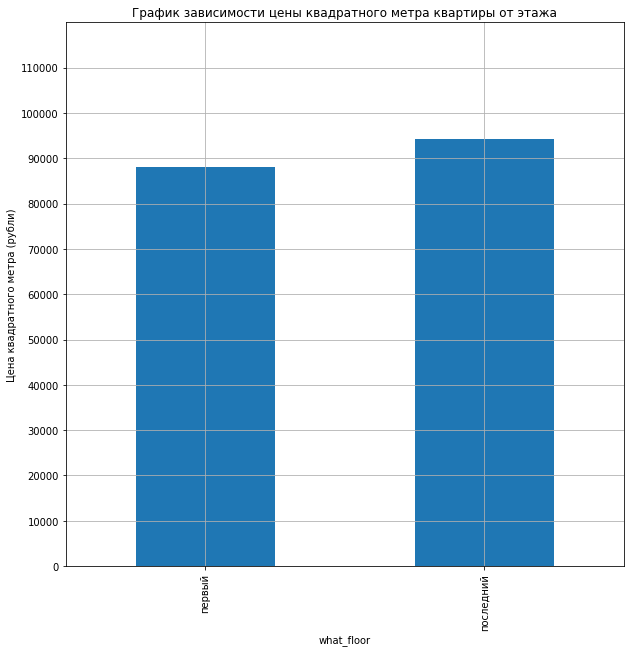

In [437]:
(data_mod
 .query('what_floor != "другой"')
 .groupby('what_floor')['price_square_metre'].median()
 .plot(x='what_floor', y='price_square_metre', kind='bar', ylim=(0,120000), grid=True, figsize=(10,10))
)
plt.yticks(range(0, 120000, 10000))
plt.title('График зависимости цены квадратного метра квартиры от этажа')
plt.ylabel('Цена квадратного метра (рубли)');

* Цена квадратного метра квартиры на первом этаже и последнем этаже отличается незначительно. На последнем больше в среднем на 6 тыс. рублей. Возможно, это связано с тем, что в нашей выборке достаточной много пятиэтажных зданий старой постройки, в которых не предусмотрен лифт, поэтому такие квартиры не в почете.

Исследуем, как влияет расстояние продаваемой квартиры до центра на цену квадратного метра. Построим график рассеивания, где по оси абсцисс будут значения расстояния до центра, а по оси ординат цена квадратного метра. Используем метод `plot` с параметром `kind='scatter'`.

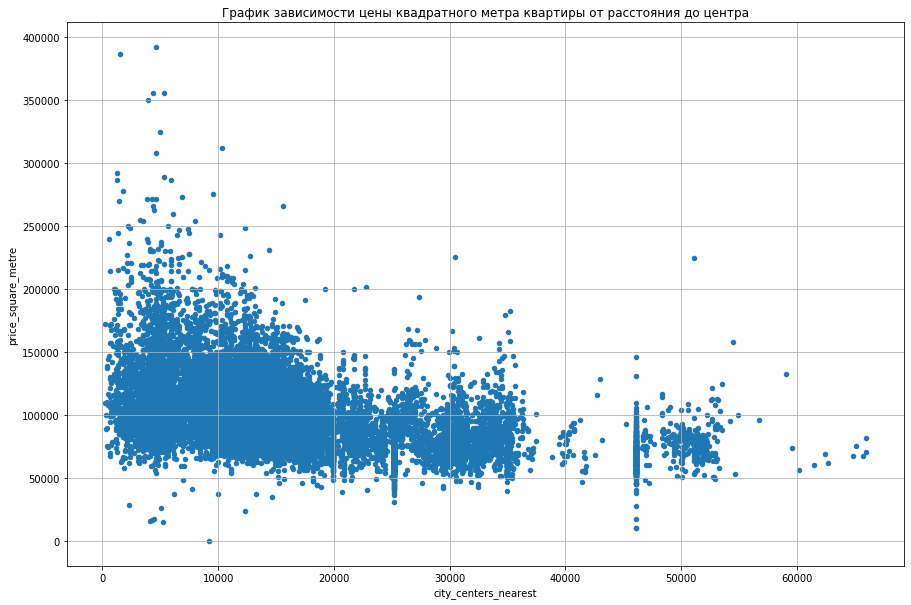

In [438]:
data_mod.plot(x='city_centers_nearest', y='price_square_metre', kind='scatter', figsize=(15,10), grid=True)
plt.title('График зависимости цены квадратного метра квартиры от расстояния до центра');

* Из графика рассеивания видно, что при увеличении расстояния до центра, цена квадратного метра уменьшается. Причем до расстояния в 20 км цена падает значительно, а затем влияние расстояния до центра уменьшается и цена падает не так резко.

Исследуем, как влияет на цену квадратного метра продаваемой квартиры день размещения объявления. Сгруппируем таблицу по значениям столбца *'weekday'* и найдем медиану цены квадратного метра для каждого дня недели. Построим столбчатый график.

Text(0, 0.5, 'Цена квадратного метра (рубли)')

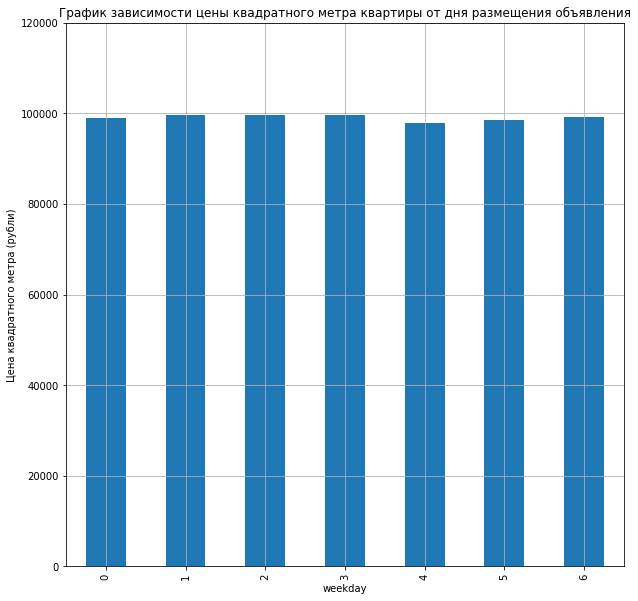

In [439]:
(data_mod
 .groupby('weekday')['price_square_metre'].median()
 .plot(x='weekday', y='price_square_metre', kind='bar', ylim=(0,120000), grid=True, figsize=(10,10))
)
plt.title('График зависимости цены квадратного метра квартиры от дня размещения объявления');
plt.ylabel('Цена квадратного метра (рубли)')

* Судя по построенному графику, нет четкой зависимости цены квадратного метра продаваемой квартиры от дня размещения объявления. Цена меняется незначительно.

Исследуем, как влияет на цену квадратного метра продаваемой квартиры месяц размещения объявления. Сгруппируем таблицу по значениям столбца *'month'* и найдем медиану цены квадратного метра для каждого месяца года. Построим столбчатый график.

Text(0, 0.5, 'Цена квадратного метра (рубли)')

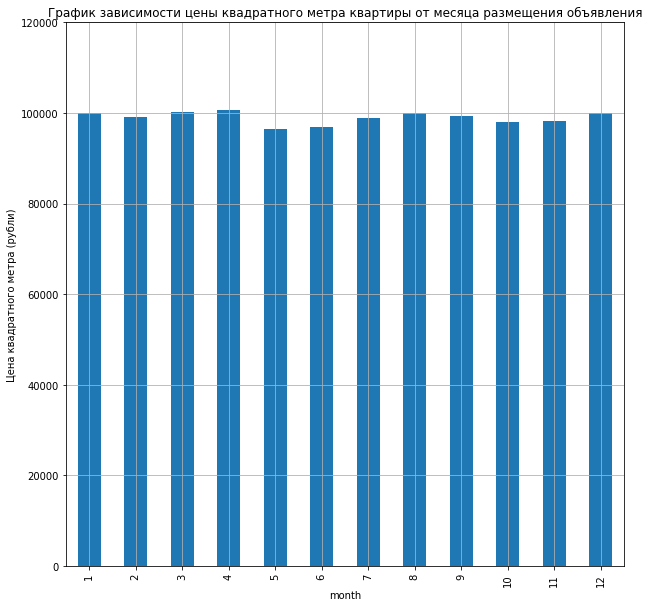

In [440]:
(data_mod
 .groupby('month')['price_square_metre'].median()
 .plot(x='month', y='price_square_metre', kind='bar', ylim=(0,120000), grid=True, figsize=(10,10))
)
plt.title('График зависимости цены квадратного метра квартиры от месяца размещения объявления');
plt.ylabel('Цена квадратного метра (рубли)')

* Цена квадратного метра продаваемых в зависимости от месяца размещения объявления меняется в среднем незначительно. Единственное, что можно сказать, это небольшое уменьшение цены в мае и июне. С чем это связано, нужно исследовать дополнительно.

Исследуем, как влияет на цену квадратного метра продаваемой квартиры год размещения объявления. Сгруппируем таблицу по значениям столбца *'year'* и найдем медиану цены квадратного метра для каждого года. Построим столбчатый график.

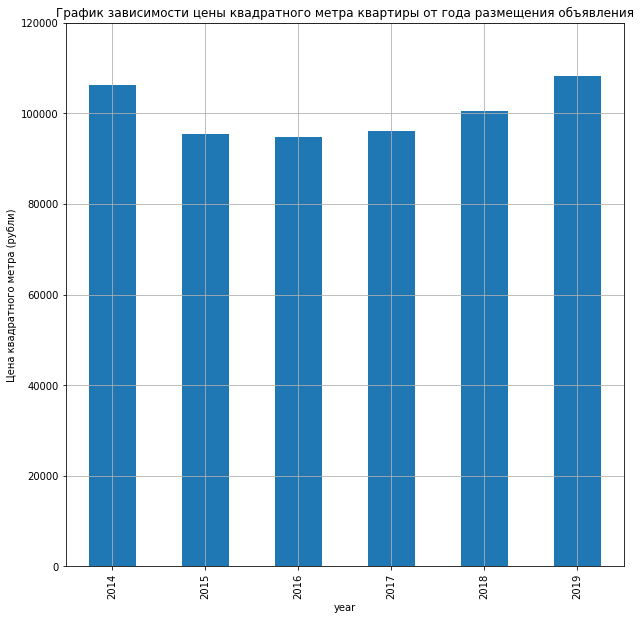

In [441]:
(data_mod
 .groupby('year')['price_square_metre'].median()
 .plot(x='year', y='price_square_metre', kind='bar', ylim=(0,120000), grid=True, figsize=(10,10))
)
plt.title('График зависимости цены квадратного метра квартиры от года размещения объявления');
plt.ylabel('Цена квадратного метра (рубли)');

* Из графика видна четкая тенденция изменения цены квадратного метра продаваемых квартир в зависимости от года размещения объявления. Резкое уменьшение цены в 2015 году в сравнении с 2014 и затем плавное увеличение цены начиная с 2017 года. Такое влияние связано с экономической и политической обстановкой в России в эти годы.

Построим также гистограмммы распределения цены квадратного метра квартир в зависимости от года подачи объявления. Используем для этого цикл `for in`, методы `groupby()` и `plot()`.

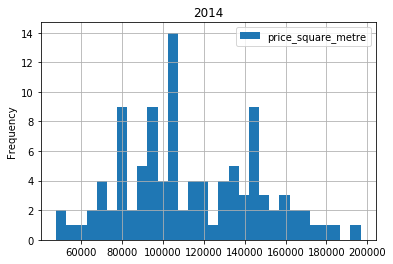

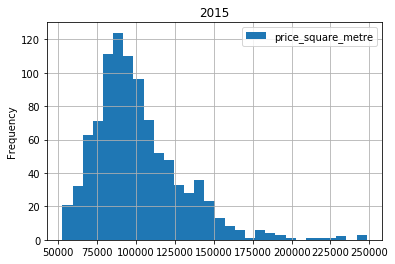

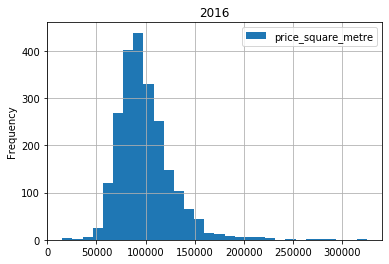

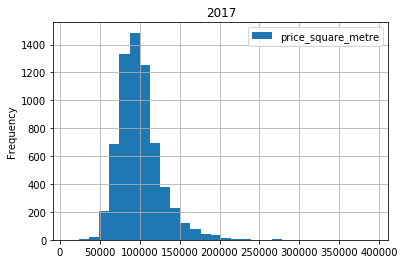

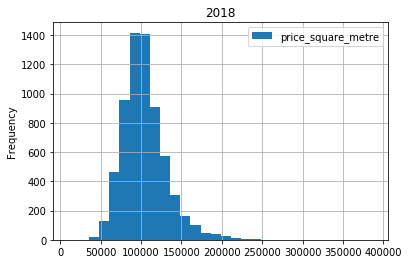

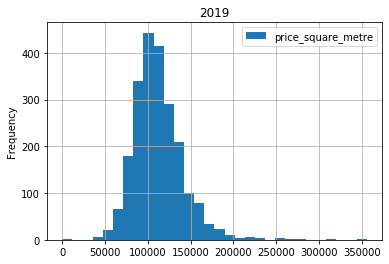

In [442]:
for name, group_data in data_mod.groupby('year'):
    group_data.plot(y='price_square_metre', kind='hist', title=name, bins=30, grid=True)

* Гистограмма распределения цены квадратного метра в 2014 году выглядит довольно необычно по сравнению с другими годами. Цены распределяются хаотично, присутствуют несколько максимумов. А так наблюдается тенденция: после 2014 года смещение максимума значений цены влево, а затем от года к году максимум перемещается вправо в сторону увеличения цены.

Исследуем, как меняется цена квадратного метра продаваемых квартир, расположенных в пригороде Санкт-Петербурга.

Для начала построим гистограмму распределения цены квадратного метра продаваемых квартир, которые расположены не в городе.

Text(0.5, 0, 'Цена квадратного метра (рубли)')

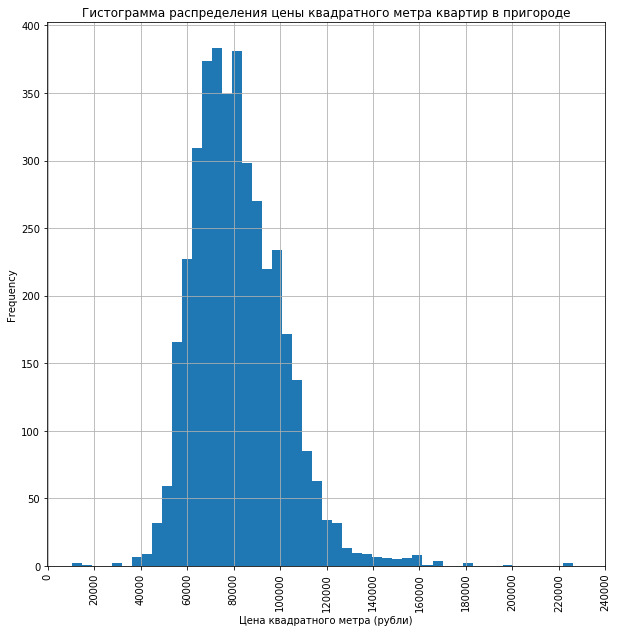

In [443]:
data_mod[data_mod['locality_name'] != 'Санкт-Петербург']['price_square_metre'].plot(kind='hist', bins=50, grid=True, figsize=(10, 10))
plt.xticks(range(0, 250000, 20000), rotation='vertical')
plt.title('Гистограмма распределения цены квадратного метра квартир в пригороде');
plt.xlabel('Цена квадратного метра (рубли)')

Построим диаграммы размаха цены квадратного метра квартир, расположенных в городе и в пригороде.

Text(0, 0.5, 'Цена квадратного метра (рубли)')

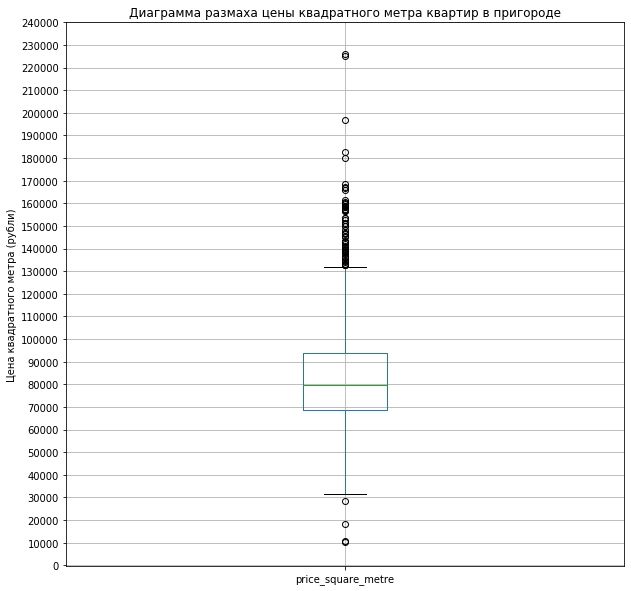

In [444]:
data_mod[data_mod['locality_name'] != 'Санкт-Петербург'].boxplot(column=['price_square_metre'], figsize=(10, 10))
plt.yticks(range(0, 250000, 10000), rotation='horizontal')
plt.title('Диаграмма размаха цены квадратного метра квартир в пригороде');
plt.ylabel('Цена квадратного метра (рубли)')

Text(0, 0.5, 'Цена квадратного метра (рубли)')

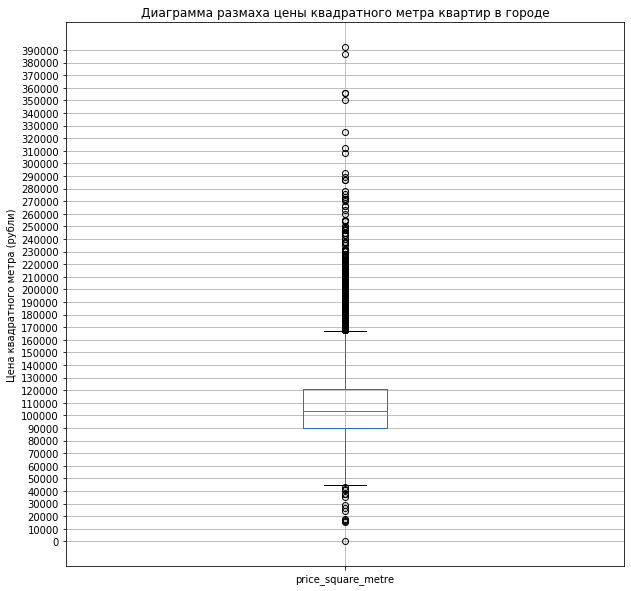

In [445]:
data_mod[data_mod['locality_name'] == 'Санкт-Петербург'].boxplot(column=['price_square_metre'], figsize=(10, 10))
plt.yticks(range(0, 400000, 10000), rotation='horizontal')
plt.title('Диаграмма размаха цены квадратного метра квартир в городе');
plt.ylabel('Цена квадратного метра (рубли)')

* График распределения цены квадратного метра продаваемых квартир в пригороде похож на нормальное распределение. Исследуем цену квадратного метра продаваемых квартир в пригороде и в городе по диаграммам размаха.

Расположение:                               | Город         | Пригород
--------------------------------|---------------|--------
Пределы изменения типичной цены | от 90 до 120 тыс. рублей| от 69 до 94 тыс. рублей
Медианная цена |103 тыс. рублей|80 тыс. рублей

* Можно сказать, что цена квадратного метра квартиры в пригороде в среднем меньше на 20 - 30 тыс. рублей, чем цена квадратного метра квартиры в городе.

Выведем на экран список 10 населенных пунктов с наибольшим количеством объявлений о продаже квартир.

In [446]:
(data
     .query('locality_name != "Санкт-Петербург"')
     .pivot_table(index='locality_name', values=['last_price'], aggfunc='count')
     .sort_values('last_price', ascending=False)
     .head(10)
)

,last_price
locality_name,
поселок Мурино,556
Кудрово,472
посёлок Шушары,440
Всеволожск,398
Пушкин,369
Колпино,338
посёлок Парголово,327
Гатчина,307
Выборг,237


Из этой тблицы данных можно сделдать вывод, что больше квартир продается в поселках, которые расположены ближе к городу.

Займемся выделением сегментов типичных квартир в городе и вне города.

Для начала выведем статистические характеристики значений расстояния до центра квартир, расположенных в Санкт-Петербурге, чтобы оценить границы города и задать границы сегментов. Используем методы `query()` и `describe()`.

In [447]:
data_mod.query('locality_name == "Санкт-Петербург"')['city_centers_nearest'].describe()

count    14818.000000
mean     11865.365771
std       4733.097022
min        208.000000
25%       8931.000000
50%      12433.000000
75%      15032.000000
max      29493.000000
Name: city_centers_nearest, dtype: float64

Среднее расстояние от границы города до центра 17 км. По расстоянию выберем следующие сегменты:
1. Меньше 10 км до центра
2. От 10 до 17 км до центра
3. От 17 до 35 км до центра

По числу комнат возьмем сегменты:
1. Однокмонатные квартиры
2. Двухкомнатные квартиры
3. Трехкомнатные квартиры

По площади четкого деления на разные категории не будет, так как нет четкой зависимости категории площади от числа комнат. Выбираем следующие сегменты:
1. Для однокомнатных подразумеваются категории площади эконом и комфорт
2. Для двухкомнатных подразумеваются категории площади комфорт и бизнес
3. Для трехкомнатных подразумеваются категории площади бизнес и премиум

Оценим количество квартир в каждом из выбранных сегментов (хорошим показателем выборки будет количество больше 1000 квартир).

In [448]:
data_mod.query('city_centers_nearest < 10000 and rooms == 3 and (area_categories == "бизнес" or area_categories == "премиум")')['last_price'].count()

1297

In [449]:
data_mod.query('city_centers_nearest < 10000 and rooms == 2 and (area_categories == "бизнес" or area_categories == "комфорт")')['last_price'].count()

1477

In [450]:
data_mod.query('city_centers_nearest < 10000 and rooms == 1')['last_price'].count()

958

In [451]:
data_mod.query('10000 < city_centers_nearest < 17000 and rooms == 3 and (area_categories == "бизнес" or area_categories == "премиум")')['last_price'].count()

2226

In [452]:
data_mod.query('10000 < city_centers_nearest < 17000 and rooms == 2 and (area_categories == "бизнес" or area_categories == "комфорт")')['last_price'].count()

3186

In [453]:
data_mod.query('10000 < city_centers_nearest < 17000 and rooms == 1 and (area_categories == "комфорт" or area_categories == "эконом")')['last_price'].count()

3536

In [454]:
data_mod.query('17000 < city_centers_nearest < 45000 and rooms == 3')['last_price'].count()

969

In [455]:
data_mod.query('17000 < city_centers_nearest < 35000 and rooms == 2 and (area_categories == "бизнес" or area_categories == "комфорт")')['last_price'].count()

1261

In [456]:
data_mod.query('17000 < city_centers_nearest < 35000 and rooms == 1 and (area_categories == "комфорт" or area_categories == "эконом")')['last_price'].count()

1510

В итоге получилось 9 сегментов продаваемых квартир по которым будем строить матрицы корреляции важных факторов квартир с ценой на квартиры. В качесте важных факторов, влияющих на цену квартиры возьмем следующие: общая площадь, жилая площадь, площадь кухни и расстояние до центра. Создадим последовательно 9 таблиц с коэффициентами корреляции данных факторов и ценой на квартиры. Также сразу будем выделять из матриц, нужный нам столбец *'last_price'*.

In [457]:
data_1 = (data_mod
          .query('city_centers_nearest < 10000 and rooms == 3 and (area_categories == "бизнес" or area_categories == "премиум")')
          .loc[:,['total_area', 'living_area', 'kitchen_area', 'city_centers_nearest', 'last_price']]
          .corr()
         )


In [458]:
data_1 = data_1['last_price'].reset_index()

In [459]:
data_2 = (data_mod
          .query('city_centers_nearest < 10000 and rooms == 2 and (area_categories == "бизнес" or area_categories == "комфорт")')
          .loc[:,['total_area', 'living_area', 'kitchen_area', 'city_centers_nearest', 'last_price']]
          .corr()
         )


In [460]:
data_2 = data_2['last_price'].reset_index()

In [461]:
data_3 = (data_mod
          .query('city_centers_nearest < 10000 and rooms == 1')
          .loc[:,['total_area', 'living_area', 'kitchen_area', 'city_centers_nearest', 'last_price']]
          .corr()
         )

In [462]:
data_3 = data_3['last_price'].reset_index()

In [463]:
data_4 = (data_mod
          .query('10000 < city_centers_nearest < 17000 and rooms == 3 and (area_categories == "бизнес" or area_categories == "премиум")')
          .loc[:,['total_area', 'living_area', 'kitchen_area', 'city_centers_nearest', 'last_price']]
          .corr()
         )

In [464]:
data_4 = data_4['last_price'].reset_index()

In [465]:
data_5 = (data_mod
          .query('10000 < city_centers_nearest < 17000 and rooms == 2 and (area_categories == "бизнес" or area_categories == "комфорт")')
          .loc[:,['total_area', 'living_area', 'kitchen_area', 'city_centers_nearest', 'last_price']]
          .corr()
         )

In [466]:
data_5 = data_5['last_price'].reset_index()

In [467]:
data_6 = (data_mod
          .query('10000 < city_centers_nearest < 17000 and rooms == 1 and (area_categories == "комфорт" or area_categories == "эконом")')
          .loc[:,['total_area', 'living_area', 'kitchen_area', 'city_centers_nearest', 'last_price']]
          .corr()
         )

In [468]:
data_6 = data_6['last_price'].reset_index()

In [469]:
data_7 = (data_mod
          .query('17000 < city_centers_nearest < 45000 and rooms == 3')
          .loc[:,['total_area', 'living_area', 'kitchen_area', 'city_centers_nearest', 'last_price']]
          .corr()
         )

In [470]:
data_7 = data_7['last_price'].reset_index()

In [471]:
data_8 = (data_mod
          .query('17000 < city_centers_nearest < 35000 and rooms == 2 and (area_categories == "бизнес" or area_categories == "комфорт")')
          .loc[:,['total_area', 'living_area', 'kitchen_area', 'city_centers_nearest', 'last_price']]
          .corr()
         )

In [472]:
data_8 = data_8['last_price'].reset_index()

In [473]:
data_9 = (data_mod
          .query('17000 < city_centers_nearest < 35000 and rooms == 1 and (area_categories == "комфорт" or area_categories == "эконом")')
          .loc[:,['total_area', 'living_area', 'kitchen_area', 'city_centers_nearest', 'last_price']]
          .corr()
         )

In [474]:
data_9 = data_9['last_price'].reset_index()

Создадим матрицу корреляции `data_price_final`, с значениями которой будем сравнивать коэффициенты корреляции выделенных сегментов. В качестве факторов, влияющих на цену квартиры, возьмем те же значения, что и для выбранных сегментов.

In [475]:
data_price_final = (data_mod
                      .loc[:,['total_area', 'living_area', 'kitchen_area', 'city_centers_nearest', 'last_price']]
                      .corr()
                   )

Также выделим из таблицы `data_price_final` столбец *'last_price'*.

In [476]:
data_price_final = data_price_final['last_price'].reset_index()

Поменяем названия столбцов.

In [477]:
data_price_final.columns = ['factors', 'main_price']

Выведем таблицу `data_price_final` на экран.

In [478]:
data_price_final

,factors,main_price
0,total_area,0.805477
1,living_area,0.687839
2,kitchen_area,0.579385
3,city_centers_nearest,-0.376457
4,last_price,1.000000


Анализ результатов будем проводить разбив сегменты на три категории по количеству комнат, и в каждой категории будет проводиться сравнения влияния факторов на цену в зависимости от расстояния до центра.

Создадим таблицу `table_1_room` путем копирования таблицы `data_price_final` методом `copy` с атрибутом `deep=True`.

In [479]:
table_1_room = data_price_final.copy(deep=True)

Теперь последовательно создадим в таблице `table_1_room` три столбца. Данные возьмем из таблиц корреляции факторов и цены для однокомнатных квартир. 

In [480]:
table_1_room['1 room < 10km'] = data_3['last_price']

In [481]:
table_1_room['10km < l room < 17km'] = data_6['last_price']

In [482]:
table_1_room['17km < l room < 35km'] = data_9['last_price']

Выведем таблицу `table_1_room` на экран, применив форматирование к числовым значениям таблицы.

In [483]:
table_1_room.style.format({'main_price':'{:.2f}', '1 room < 10km':'{:.2f}', '10km < l room < 17km':'{:.2f}','17km < l room < 35km':'{:.2f}'})

,factors,main_price,1 room < 10km,10km < l room < 17km,17km < l room < 35km
0,total_area,0.81,0.67,0.66,0.51
1,living_area,0.69,0.37,0.19,0.07
2,kitchen_area,0.58,0.58,0.53,0.47
3,city_centers_nearest,-0.38,-0.39,-0.09,-0.22
4,last_price,1.00,1.00,1.00,1.00


Для наглядности отобразим значения коэффициентов Пирсона из таблицы ` table_1_room` графически. Используем метод `plot()` с параметром `kind='bar'`.

Text(0, 0.5, 'Коэффициент Пирсона')

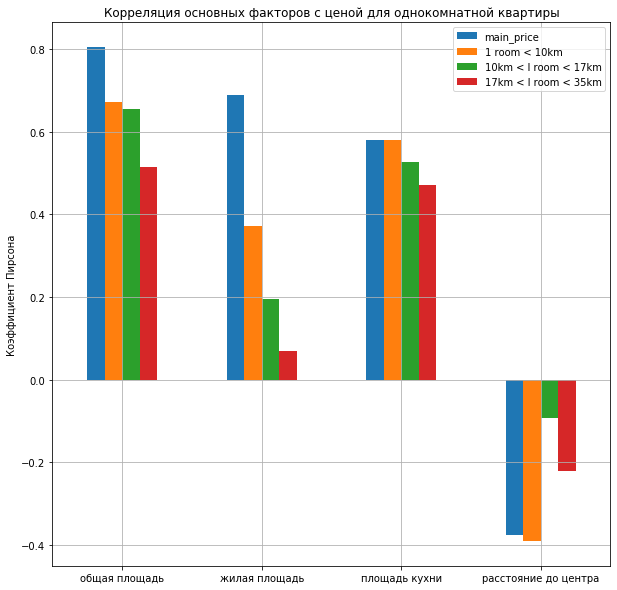

In [484]:
table_1_room.loc[:3].plot(kind='bar', figsize=(10, 10), grid=True)
plt.title('Корреляция основных факторов с ценой для однокомнатной квартиры');
plt.xticks([0, 1, 2, 3], ['общая площадь', 'жилая площадь', 'площадь кухни', 'расстояние до центра'], rotation='horizontal')
plt.ylabel("Коэффициент Пирсона")

* Для однокомнатных квартир в категориях общая площадь и жилая площадь влияние основных факторов на цену в меньше чем влияние этих факторов на цену квартир по всем объявлениям. И чем дальше от центра расположена продаваемая квартира, тем меньше влияют данные факторы, и быстрее с ростом расстояния уменьшается влияние жилой площади.

* В категории площадь кухни, в квартирах, расположенных до 10 км от центра влияние этого фактора такое же как и влияние площади кухни по всем объявлениям, затем, с увеличением расстояния, влияние уменьшается.

* В категории расстояние до центра, в сегменте квартир меньше 10 км от центра влияние этого фактора сильнее, чем влияние расстояние до центра по всем объявлениям о продаже квартир. Затем резкое снижение влияния в следующем сегменте, а потом опять увеличение влияния. Четкой зависимости во влиянии расстояния до центра в сегменте однокомнатных квартир не наблюдается.

Создадим таблицу `table_2_room` путем копирования таблицы `data_price_final` методом `copy` с атрибутом `deep=True`.

In [485]:
table_2_rooms = data_price_final.copy(deep=True)

Теперь последовательно создадим в таблице `table_2_room` три столбца. Данные возьмем из таблиц корреляции факторов и цены для двухкомнатных квартир. 

In [486]:
table_2_rooms['2 rooms < 10km'] = data_2['last_price']

In [487]:
table_2_rooms['10km < 2 rooms < 17km'] = data_5['last_price']

In [488]:
table_2_rooms['17km < 2 rooms < 35km'] = data_8['last_price']

Выведем таблицу `table_2_room` на экран, применив форматирование к числовым значениям таблицы.

In [489]:
table_2_rooms.style.format({'main_price':'{:.2f}', '2 rooms < 10km':'{:.2f}', '10km < 2 rooms < 17km':'{:.2f}','17km < 2 rooms < 35km':'{:.2f}'})

,factors,main_price,2 rooms < 10km,10km < 2 rooms < 17km,17km < 2 rooms < 35km
0,total_area,0.81,0.72,0.82,0.65
1,living_area,0.69,0.40,0.52,0.35
2,kitchen_area,0.58,0.52,0.65,0.50
3,city_centers_nearest,-0.38,-0.23,-0.10,-0.16
4,last_price,1.00,1.00,1.00,1.00


Отобразим значения коэффициентов Пирсона из таблицы графически, используем столбчатый график.

Text(0, 0.5, 'Коэффициент Пирсона')

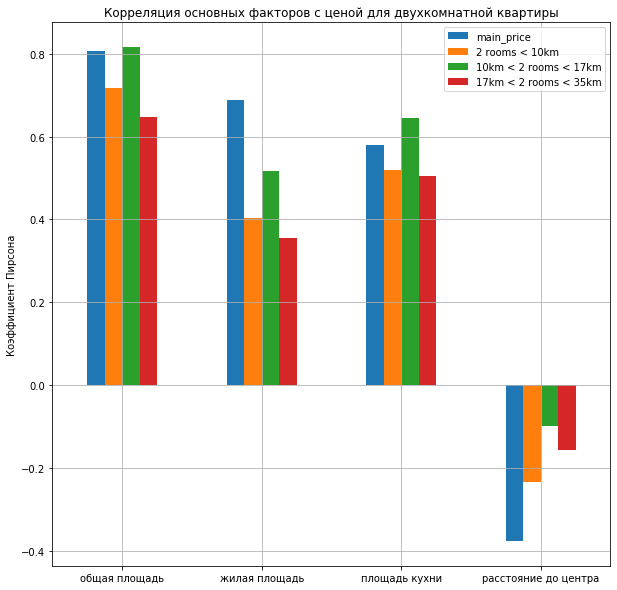

In [490]:
table_2_rooms.loc[:3].plot(kind='bar', figsize=(10, 10), grid=True)
plt.title('Корреляция основных факторов с ценой для двухкомнатной квартиры');
plt.xticks([0, 1, 2, 3], ['общая площадь', 'жилая площадь', 'площадь кухни', 'расстояние до центра'], rotation='horizontal')
plt.ylabel("Коэффициент Пирсона")

* Для двухкомнатных квартир в сегментах меньше 10 км до центра и от 17 до 35 км до центра влияние основных факторов на цену меньше чем влияние факторов во всех объявлениях о продаже квартир. 
* Также это влияние уменьшается с ростом расстояния от центра. На графиках площадей выделяется сегмент двухкомнатных квартир, расположенных от 10 до 17 км до центра. Влияние факторов в данном сегменте заметно выше, чем в других, а в категориях факторов общая площадь и площадь кухни даже превышает влияние по всем объявлениям.
* В категории расстояние до центра сегмент квартир, расположенных от 10 до 17 км, влияние данного фактора имеет самое маленькое значение и выбивается из общего плавного уменьшения влияния фактора расстояния до центра.

Создадим таблицу `table_3_room` путем копирования таблицы `data_price_final` методом `copy` с атрибутом `deep=True`.

In [491]:
table_3_rooms = data_price_final.copy(deep=True)

Теперь последовательно создадим в таблице `table_3_room` три столбца. Данные возьмем из таблиц корреляции факторов и цены для трехкомнатных квартир.

In [492]:
table_3_rooms['3 rooms < 10km'] = data_1['last_price']

In [493]:
table_3_rooms['10km < 3 rooms < 17km'] = data_4['last_price']

In [494]:
table_3_rooms['17km < 3 rooms < 45km'] = data_7['last_price']

Выведем таблицу `table_3_room` на экран, применив форматирование к числовым значениям таблицы.

In [495]:
table_3_rooms.style.format({'main_price':'{:.2f}', '3 rooms < 10km':'{:.2f}', '10km < 3 rooms < 17km':'{:.2f}','17km < 3 rooms < 45km':'{:.2f}'})

,factors,main_price,3 rooms < 10km,10km < 3 rooms < 17km,17km < 3 rooms < 45km
0,total_area,0.81,0.69,0.84,0.67
1,living_area,0.69,0.44,0.62,0.49
2,kitchen_area,0.58,0.53,0.66,0.50
3,city_centers_nearest,-0.38,-0.14,-0.12,-0.07
4,last_price,1.00,1.00,1.00,1.00


Отобразим значения коэффициентов Пирсона из таблицы графически, используем столбчатый график.

Text(0, 0.5, 'Коэффициент Пирсона')

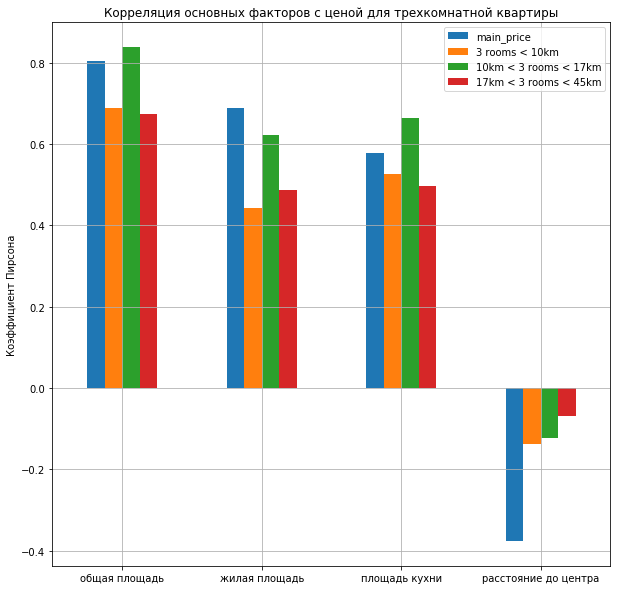

In [496]:
table_3_rooms.loc[:3].plot(kind='bar', figsize=(10, 10), grid=True)
plt.title('Корреляция основных факторов с ценой для трехкомнатной квартиры');
plt.xticks([0, 1, 2, 3], ['общая площадь', 'жилая площадь', 'площадь кухни', 'расстояние до центра'], rotation='horizontal')
plt.ylabel("Коэффициент Пирсона")

* В категориях общая площадь и площадь кухни, влияние данных факторов остается на заметном высоком уровне при увеличении расстояния до центра. Но больше это проявляется в сегменте квартир расположенных на расстоянии от 10 до 17 км до центра. Влияние данных факторов в данном сегменте превышает влияние общей площади и площади кухни на цену квартиры по всем объявлениям.
* В категории жилая площадь не наблюдается четкой зависимости в изменении влияния данного фактора в зависимости от расстояния до центра. Единственное, в сегменте квартир от 10 до 17 км до центра, влияние данного фактора выше, чем в других сегментах, но ниже влияния во всем объявлениям.
* В категории расстояние до центра наблюдается резкое уменьшение влияния данного фактора с ростом расстояния до центра.

Исследуем влияние различных параметров на цену апартаментов, студий и квартир свободной планировки и сравним его с влиянием этих параметров на цену квартир по всем объявлениям.

Создадим матрицу корреляции `data_apartments`, чтобы исследовать значений различных параметров на цену апартаментов. 

In [497]:
data_apartments = (data_mod
                          .query('is_apartment == True')
                          .loc[:,['living_area', 'rooms', 'kitchen_area', 'ceiling_height', 'floor', 'balcony', 'days_exposition', 'last_price',
                                    'total_images', 'total_area', 'city_centers_nearest', 'floors_total', 'airports_nearest',
                                        'parks_around_3', 'parks_nearest', 'ponds_around_3', 'ponds_nearest']]
                          .corr()
                         )

Узнаем сколько квартир-апартаментов в нашей выборке.

In [498]:
len(data_mod.query('is_apartment == True'))

35

Их **всего 35!!!** Исследование будет проведено, но получить реальные результаты с такими скудным данными невозможно.

Выведем столбец значений *'last_price'*.

In [499]:
data_apartments['last_price']

living_area             0.588327
rooms                   0.532979
kitchen_area            0.135794
ceiling_height          0.266553
floor                  -0.045213
balcony                 0.343640
days_exposition         0.089123
last_price              1.000000
total_images           -0.062409
total_area              0.614780
city_centers_nearest    0.013663
floors_total           -0.311223
airports_nearest        0.088145
parks_around_3          0.522671
parks_nearest           0.526525
ponds_around_3          0.446843
ponds_nearest          -0.541739
Name: last_price, dtype: float64

Факторов, оказывающих заметное влияние на 35 апартаментов довольно много =)

Перейдем теперь к студиям. Выведем на экран значения столбца *'rooms'* для всех студий из таблицы с помощью метода `value_counts()`.

In [500]:
data.query('studio == True')['rooms'].value_counts()

0    138
1     11
Name: rooms, dtype: int64

Выходит 138 квартир-студий, где в графе количество комнат люди написали "0". Поэтому для построения матрицы корреляции `data_studio` сделаем срез по исходной таблице `data` заново, убрав условие с количеством комнат.

In [501]:
data_studio = (data
                  .query('studio == True and 10 < total_area < 550 and last_price < 20000000 and 2 <= ceiling_height <= 4 and city_centers_nearest < 75000')
                  .loc[:,['living_area', 'rooms', 'kitchen_area', 'ceiling_height', 'floor', 'balcony', 'days_exposition', 'last_price',
                            'total_images', 'total_area', 'city_centers_nearest', 'floors_total', 'airports_nearest',
                                'parks_around_3', 'parks_nearest', 'ponds_around_3', 'ponds_nearest']]
                  .corr()
                 )

Узнаем сколько квартир-студий в нашей выборке.

In [502]:
len(data.query('studio == True and 10 < total_area < 550 and last_price < 20000000 and 2 <= ceiling_height <= 4 and city_centers_nearest < 75000'))

112

Получилось 112 квартир, уже лучше, но для правдоподобных результатов все равно мало.

Выведем столбец значений *'lastPrice'*.

In [503]:
data_studio['last_price']

living_area             0.771446
rooms                  -0.044179
kitchen_area            0.716699
ceiling_height          0.338945
floor                  -0.039071
balcony                 0.134136
days_exposition         0.174378
last_price              1.000000
total_images            0.208272
total_area              0.868624
city_centers_nearest   -0.436201
floors_total           -0.152011
airports_nearest       -0.018825
parks_around_3         -0.096816
parks_nearest           0.391587
ponds_around_3         -0.072497
ponds_nearest           0.117309
Name: last_price, dtype: float64

Перейдем к квартирам свободной планировки.

Посмотрим есть ли здесь квартиры с числом комнат, равным "0".

In [504]:
data.query('open_plan == True')['rooms'].value_counts()

0    59
1     3
3     2
5     1
4     1
2     1
Name: rooms, dtype: int64

Большая часть!!! Поэтому для построения матрицы корреляции `data_open_plan` также уберем условие про число комнат.

In [505]:
data_open_plan = (data
                      .query('open_plan == True and 10 < total_area < 550 and last_price < 20000000 and 2 <= ceiling_height <= 4 and city_centers_nearest < 75000')
                      .loc[:,['living_area', 'rooms', 'kitchen_area', 'ceiling_height', 'floor', 'balcony', 'days_exposition', 'last_price',
                                'total_images', 'total_area', 'city_centers_nearest', 'floors_total', 'airports_nearest',
                                    'parks_around_3', 'parks_nearest', 'ponds_around_3', 'ponds_nearest']]
                      .corr()
                     )

Узнаем сколько квартир свободной планировки в нашей выборке.

In [506]:
len(data.query('open_plan == True and 10 < total_area < 550 and last_price < 20000000 and 2 <= ceiling_height <= 4 and city_centers_nearest < 75000'))

49

Ситуация такая же, как и с апартаментами.

Выведем столбец *'last_price'* на экран.

In [507]:
data_open_plan['last_price']

living_area             0.852919
rooms                   0.770614
kitchen_area            0.622767
ceiling_height          0.762244
floor                  -0.022263
balcony                -0.387109
days_exposition         0.193119
last_price              1.000000
total_images           -0.065523
total_area              0.872318
city_centers_nearest   -0.314146
floors_total           -0.204458
airports_nearest       -0.096264
parks_around_3         -0.083877
parks_nearest          -0.199937
ponds_around_3         -0.215815
ponds_nearest           0.049087
Name: last_price, dtype: float64

Для исследования выбираем следующие параметры: общая площадь, жилая площадь, расстояние до центра, число комнат, цена, число балконов, количество парков в радиусе 3 км, расстояние до ближайшего парка, количество прудов в радиусе 3 км, расстояние до ближайшего пруда.

Создадим матрицу корреляции по всем объявлениям `data_price_final_2`, в качестве значений среза выберем вышеуказанные параметры.

In [508]:
data_price_final_2 = (data_mod
                          .loc[:,['total_area', 'living_area', 'kitchen_area', 'city_centers_nearest', 'rooms', 'last_price',
                                 'balcony', 'parks_around_3', 'parks_nearest', 'ponds_around_3', 'ponds_nearest']]
                          .corr()
                         )

Выделим из таблицы `data_price_final_2` столбец *'last_price'*.

In [509]:
data_price_final_2 = data_price_final_2['last_price'].reset_index()

Поменяем названия столбцов таблицы `data_price_final_2`.

In [510]:
data_price_final_2.columns = ['factors', 'main_price']

Выведем таблицу на экран.

In [511]:
data_price_final_2

,factors,main_price
0,total_area,0.805477
1,living_area,0.687839
2,kitchen_area,0.579385
3,city_centers_nearest,-0.376457
4,rooms,0.557178
5,last_price,1.000000
6,balcony,0.136765
7,parks_around_3,0.163490
8,parks_nearest,0.059783
9,ponds_around_3,0.177166


Создаем матрицы корреляции для апартаментов, студий и квартир свободной планировки.

In [512]:
data_apartments_final = (data_mod
                              .query('is_apartment == True')
                              .loc[:,['total_area', 'living_area', 'kitchen_area', 'city_centers_nearest', 'rooms', 'last_price',
                                 'balcony', 'parks_around_3', 'parks_nearest', 'ponds_around_3', 'ponds_nearest']]
                              .corr()
                              .reset_index()   
                         )

In [513]:
data_studio_final = (data
                      .query('studio == True and 10 < total_area < 550 and last_price < 20000000 and 2 <= ceiling_height <= 4 and city_centers_nearest < 75000')
                      .loc[:,['total_area', 'living_area', 'kitchen_area', 'city_centers_nearest', 'rooms', 'last_price',
                                 'balcony', 'parks_around_3', 'parks_nearest', 'ponds_around_3', 'ponds_nearest']]
                      .corr()
                      .reset_index()
                     )

In [514]:
data_open_plan_final = (data
                          .query('open_plan == True and 10 < total_area < 550 and last_price < 20000000 and 2 <= ceiling_height <= 4 and city_centers_nearest < 75000')
                          .loc[:,['total_area', 'living_area', 'kitchen_area', 'city_centers_nearest', 'rooms', 'last_price',
                                 'balcony', 'parks_around_3', 'parks_nearest', 'ponds_around_3', 'ponds_nearest']]
                          .corr()
                          .reset_index()
                        )

Добавляем в таблицу `data_price_final_2` столбцы *'last_price'* из созданных выше таблиц.

In [515]:
data_price_final_2['apartments'] = data_apartments_final['last_price']

In [516]:
data_price_final_2['studio'] = data_studio_final['last_price']

In [517]:
data_price_final_2['open_plan'] = data_open_plan_final['last_price']

Выведем таблицу `data_price_final_2` на экран, применив форматирование к численным значениям таблицы.

In [518]:
data_price_final_2.style.format({'main_price':'{:.2f}', 'apartments':'{:.2f}', 'studio':'{:.2f}','open_plan':'{:.2f}'})

,factors,main_price,apartments,studio,open_plan
0,total_area,0.81,0.61,0.87,0.87
1,living_area,0.69,0.59,0.77,0.85
2,kitchen_area,0.58,0.14,0.72,0.62
3,city_centers_nearest,-0.38,0.01,-0.44,-0.31
4,rooms,0.56,0.53,-0.04,0.77
5,last_price,1.00,1.00,1.00,1.00
6,balcony,0.14,0.34,0.13,-0.39
7,parks_around_3,0.16,0.52,-0.10,-0.08
8,parks_nearest,0.06,0.53,0.39,-0.20
9,ponds_around_3,0.18,0.45,-0.07,-0.22


Отобразим значения коэффициентов Пирсона из таблицы графически, используем столбчатый график.

Text(0, 0.5, 'Correlation')

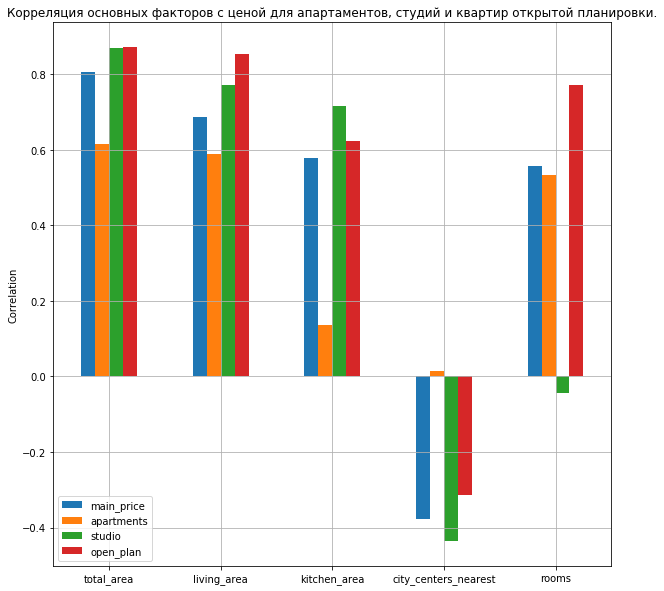

In [519]:
data_price_final_2.loc[:4].plot(kind='bar', figsize=(10, 10), grid=True)
plt.title('Корреляция основных факторов с ценой для апартаментов, студий и квартир открытой планировки.');
plt.xticks([0, 1, 2, 3, 4], ['total_area', 'living_area', 'kitchen_area', 'city_centers_nearest', 'rooms'], rotation='horizontal')
plt.ylabel("Correlation")

Разобьем графики на две части для более наглядого изображения.

Text(0, 0.5, 'Correlation')

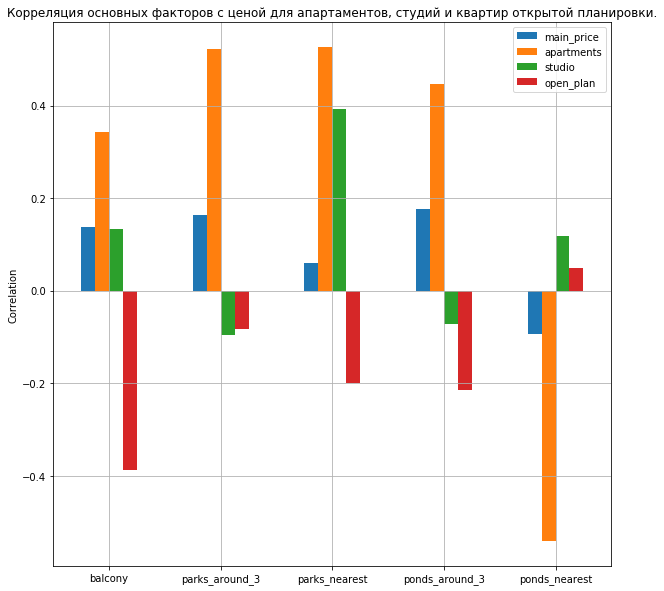

In [520]:
data_price_final_2.loc[6:].plot(kind='bar', figsize=(10, 10), grid=True)
plt.title('Корреляция основных факторов с ценой для апартаментов, студий и квартир открытой планировки.');
plt.xticks([0, 1, 2, 3, 4], ['balcony', 'parks_around_3', 'parks_nearest', 'ponds_around_3', 'ponds_nearest'], rotation='horizontal')
plt.ylabel("Correlation")

* В категориях общая площадь, жилая площадь, площадь кухни влияние данных факторов на цену студий и квартир свободной планировки выше, чем по всем объявлениям, а на апартаменты эти факторы влияют меньше, чем по всем объявлениям.
* Расстояние до центра не влияет на цену апартаментов, но заметно влияет на цену студий и квартир свободной планировки.
* Касательно фактора количество комнат, данный фактор не влияет на цену студий, но заметно влияет на цену апартаментов, и сильно влияет на цену квартир свободной планировки.
* А о влиянии факторов количество балконов, парки в радиусе  3 км, расстояния до ближайшего парка, пруды в радиусе 3 км, расстояние до ближайшего пруда сложно сказать что-то объекивное. Получились слишком разные корреляции, чтобы можно было сравнить их друг с другом.

К данным выводам нужно добавить, что выборки для исследования очень малы, и это скорее всего свидетельствует о недостверных реультатах, хотя часть из результатов подтверждается реальным положением вещей.

------

## Результаты работы

### Описание хода работы на 1 этапе исследования

В ходе работы над проектом большую часть времени занял этап предобработки данных. В полученной базе объявлений о продажах квартир было обнаружено большое количество пропусков. Удалить такие пропуски или заменить средним (медианой) было бы неправильно, так как это внесет искажения в распределения характеристик данных. А это в итоге отрицательно отразится на результатах исследования. Пропуски заменялись путем категоризации данных по какому-либо параметру, находилось значение медианы в каждой группе и затем это значение подставлялось в соответствующую ячейку данных. Параметр выбирался по матрице корреляции, обычно с которым самый большой коэффициент Пирсона. Параметр *высота потолка* был заменен медианой по всем значениям, но данный параметр был исключен из оценки результатов исследования. Часть данных была оставлена с пропусками ввиду невозможности их качественного заполнения.

Часть пропусков возникла по причине незаполнения полей параметров квартиры при подаче объявления о продаже.  Другая часть пропусков возникла скорее всего в результате ошибок при сборе картографических данных. Также, любой из данных пропусков мог возникнуть в результате ошибок при выгрузке данных. По поводу такого большого количества пропусков можно было бы направить баг-репорт специалистам, которые предоставили данные, с целью проверки данных на ошибки выгрузки, а также чтобы уведомить о возможных ошибках при сборе картографических данных.

### Выводы по задачам исследования Задания 2

* **Типичные параметры продаваемых квартир.**

Типичный параметр | Межквартильный размах | Медиана
------------------|----------------|---------------
Общая площадь | 40 - 65 кв. метров | 52 кв. метра
Жилая площадь | 18 - 42 кв. метра | 30 кв. метров
Площадь кухни | 7 - 11 кв. метров | 9 кв. метров
Число комнат | 1 - 3 комнаты | 2 комнаты
Цена | 3,5 - 6,5 млн. рублей | 4,5 млн. рублей
Цена кв. метра | 78 - 112 тыс. рублей | 95 тыс. рублей
Расстояние до центра | 10 - 17 км | 13,8 км
Длительность продажи | 42 - 210 дней | 90 дней



Исходя из этого этапа исследования, можно сказать, что типичные продаваемые квартиры это 1- и 2-комнатные, примерно меньше на 2000 продается 3-комнатных квартир. Средняя длительность продажи составляет 90 дней. При анализе гистограммы распределения значений длительности продажи были обнаружены подозрительные максимумы продаж прмерно на 40 день и 60 день. Возможно, это проявление неких мошеннических операций с недвижимостью. Нужно исследовать эту особенность подробнее. Также выяснилось что квартиры в основном продаются в городе, нежели в населенных пунктах. Дома, в которых продаются квартиры это в основном пяти- и девятиэтажные здания.

* **Необычные параметры квартир.**

На этом этапе исследования были обнаружены квартиры, например, с высотой потолков 100 м, с ценой 763 млн. рублей или площадью 900 кв. метров. Также имеются квартиры с числом комнат, равным 0 (как позже выяснилось, это студии и квартиры открытой планировки). Для исследования были применениы следующие условия по параметрам: общая площадь от 10 до 550 кв. метров, цена меньше 20 млн. рублей, число комнат больше 0, высота потолков от 2 до 4 метров, расстояние до центра меньше 75 км.

* **Изучение факторов, влияющих на стоимость квартир.**

На данном этапе исследования было обнаружено, что на цену продаваемой квартиры больше всего влияет жилая площадь, количество комнат, площадь кухни, общая площадь квартиры и в меньшей степени расстояние до центра.

Наблюдается явное влияние числа комнат на цену квадратного метра продаваемых квартир. Самая высокая цена у однокомнатных квартир. Можно сказать, что при увеличении числа комнат в продаваемых квартирах, стоимость квадратного метра квартир уменьшается.

Цена квадратного метра квартиры на первом этаже и последнем этаже отличается незначительно. Цена квадратного метра квартир на последнем этаже в среднем больше на 6 тыс. рублей.Возможно, это связано с тем, что в нашей выборке достаточной много пятиэтажных зданий старой постройки, в которых не предусмотрен лифт, поэтому цена квадратного метра отличается незначительно.

При увеличении расстояния до центра, цена квадратного метра уменьшается. Причем до расстояния в 20 км цена падает значительно, а затем влияние расстояния до центра уменьшается и цена падает не так резко. Квартиры с расстоянием до центра больше 20 км уже в основном продаются в пригороде, поэтому расстояние до центра не так важно.

День и месяц подачи объявления о продаже квартиры не не влияет на цену квадратного метра. Обнаружена тенденция изменения цены квадратного метра продаваемых квартир в зависимости от года размещения объявления. Резкое уменьшение цены в 2015 году в сравнении с 2014 и затем плавное увеличение цены начиная с 2017 года. Зависимость цены квадратного метра квартир от года размещения подтверждается реальными данными.

* **Исследование стоимости квадратного метра квартир, которые продаются в пригороде.**

В ходе исследования были получены следующие результаты.

Расположение:                               | Город         | Пригород
--------------------------------|---------------|--------
Пределы изменения типичной цены | от 90 до 120 тыс. рублей| от 69 до 94 тыс. рублей
Медианная цена |103 тыс. рублей|80 тыс. рублей

Можно сказать, что цена квадратного метра квартиры в пригороде в среднем меньше на 20 - 30 тыс. рублей, чем цена квадратного метра квартиры в городе.

Населенные пункты с наибольшим количеством объявлений о продаже квартир.

Наименование | Число объявлений
-------------|-----------------
поселок Мурино | 556
Кудрово | 472
посёлок Шушары |440
Всеволожск | 398
Пушкин | 369
Колпино | 338
посёлок Парголово | 327
Гатчина | 307
Выборг | 237
Петергоф | 201

Можно сказать что больше квартир продается в населенных пунктах, которые расположены ближе к городу.

* **Сравнений корреляций факторов, влияющих на цену квартир, со стоимостью квартир в выделенных сегментах и по всем объявлениям.**

Корреляция цены квартир исследовалась со следующими факторами: общая площадь, жилая площадь, площадь кухни и расстояние до центра. В ходе исследования было обнаружено, что влияние этих факторов в основной массе меньше, чем их влияние по всем объявлениям. Также в основном влияние этих факторов на цену квартир уменьшается при увеличении расстояния до центра города. Явное исключение здесь составляют сегменты двухкомнатных и трехкомнатных квартир на расстоянии от 10 до 17 км до центра. В них влияние данных факторов заметно выше, чем в соседних сегментах, а иногода превышает влияние по всем объявлениям.

Также можно сказать, что по всем сегментам влияние на цену квартир таких факторов, как общая площадь и площадь кухни заметно выше, чем влияние жилой площади и расстояния до центра.

* **Исследование характерных параметров апартаментов, студий и квартир свободной планировки.**

Для данного исследования получились слишком маленькие выборки данных, поэтому результаты могут быть недостоверными.

В категориях общая площадь, жилая площадь, площадь кухни влияние данных факторов на цену студий и квартир свободной планировки выше, чем по всем объявлениям, а на апартаменты эти факторы влияют меньше, чем по всем объявлениям.

Расстояние до центра не влияет на цену апартаментов, но заметно влияет на цену студий и квартир свободной планировки.

Касательно фактора количество комнат, данный фактор не влияет на цену студий, но заметно влияет на цену апартаментов, и сильно влияет на цену квартир свободной планировки.